# Credit Card Fraud Detection

Follow the book: Beginning MLOps with MLFlow Deploy Models in AWS SageMaker, Google Cloud, and Microsoft Azure by Sridhar Alla, Suman Kalyan Adari

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from pylab import rcParams

rcParams['figure.figsize'] = 14, 8

In [3]:
data_path = "data/creditcard.csv"
df = pd.read_csv(data_path)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.shape

(284807, 31)

In [7]:
anomalies = df[df.Class == 1]
normal = df[df.Class == 0]

print(f"Anomalies: {anomalies.shape}")
print(f"Normal: {normal.shape}")

Anomalies: (492, 31)
Normal: (284315, 31)


Text(0, 0.5, 'Counts')

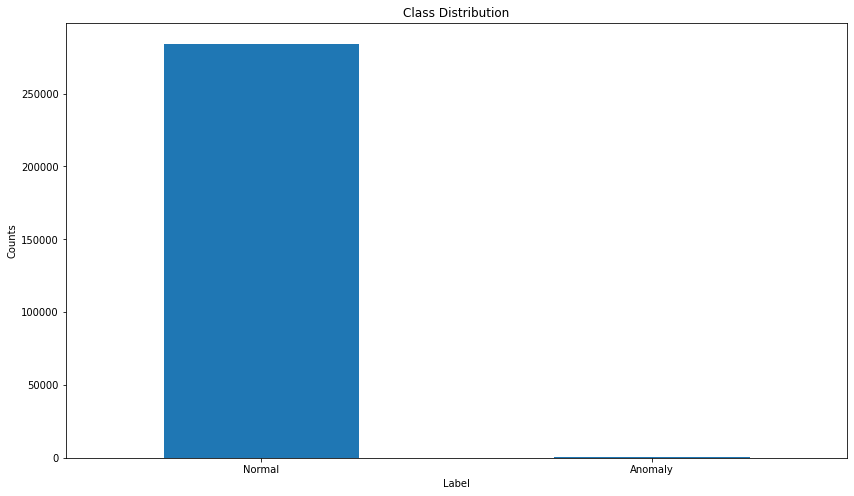

In [10]:
class_counts = pd.value_counts(df['Class'], sort = True)
class_counts.plot(kind = 'bar', rot=0)
plt.title("Class Distribution")
plt.xticks(range(2), ["Normal", "Anomaly"])
plt.xlabel("Label")
plt.ylabel("Counts")

In [11]:
anomalies.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
def plot_histogram(df, bins, column, log_scale=False): 
    
    bins = 100
    anomalies = df[df.Class == 1]
    normal = df[df.Class == 0]
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True) 
    fig.suptitle(f'Counts of {column} by Class')
    ax1.hist(anomalies[column], bins = bins, color="red")
    ax1.set_title('Anomaly')
    ax2.hist(normal[column], bins = bins, color="orange")
    ax2.set_title('Normal')
    plt.xlabel(f'{column}') 
    plt.ylabel('Count')
    if log_scale:
        plt.yscale('log')
    plt.xlim((np.min(df[column]), np.max(df[column])))
    plt.show()

In [16]:
def plot_scatter(df, x_col, y_col, sharey = False): 
    anomalies = df[df.Class == 1]
    normal = df[df.Class == 0]
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=sharey)
    fig.suptitle(f'{y_col} over {x_col} by Class')
    ax1.scatter(anomalies[x_col], anomalies[y_col], color='red') 
    ax1.set_title('Anomaly')
    ax2.scatter(normal[x_col], normal[y_col], color='orange')
    ax2.set_title('Normal')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

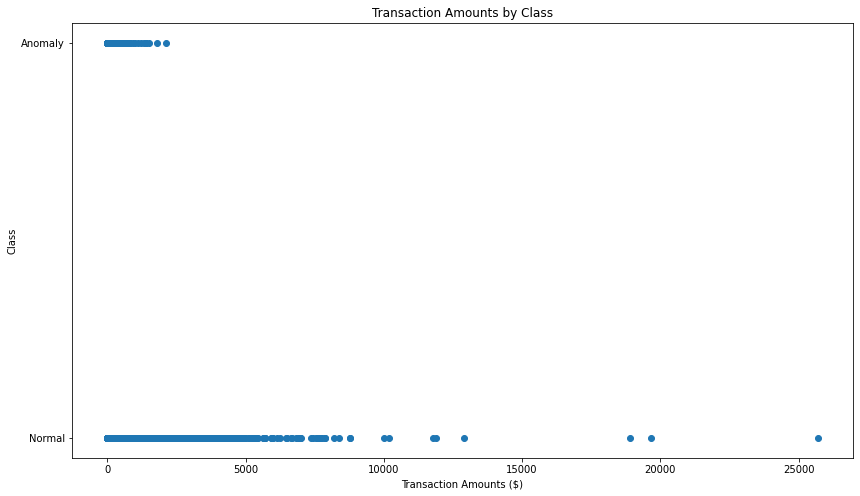

In [19]:
plt.scatter(df.Amount, df.Class) 
plt.title("Transaction Amounts by Class") 
plt.ylabel("Class")
plt.yticks(range(2), ["Normal", "Anomaly"]) 
plt.xlabel("Transaction Amounts ($)")
plt.show()

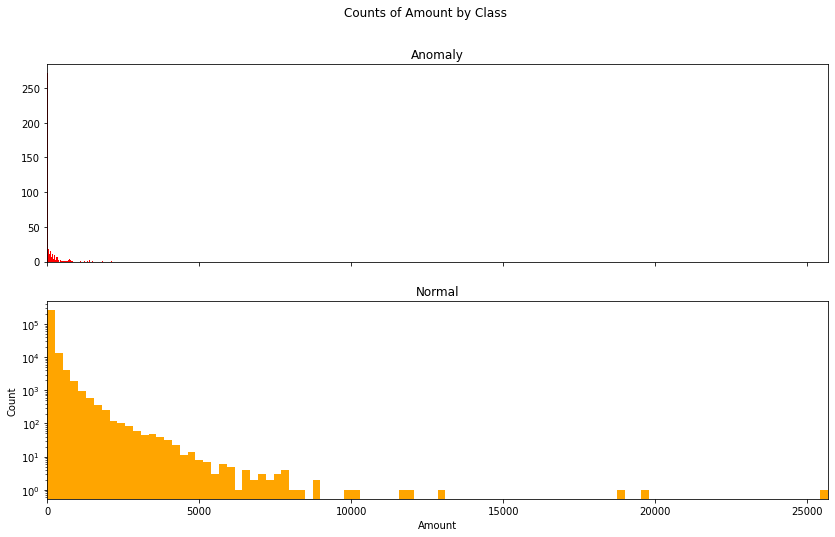

In [20]:
bins = 100
plot_histogram(df, bins, "Amount", log_scale=True)

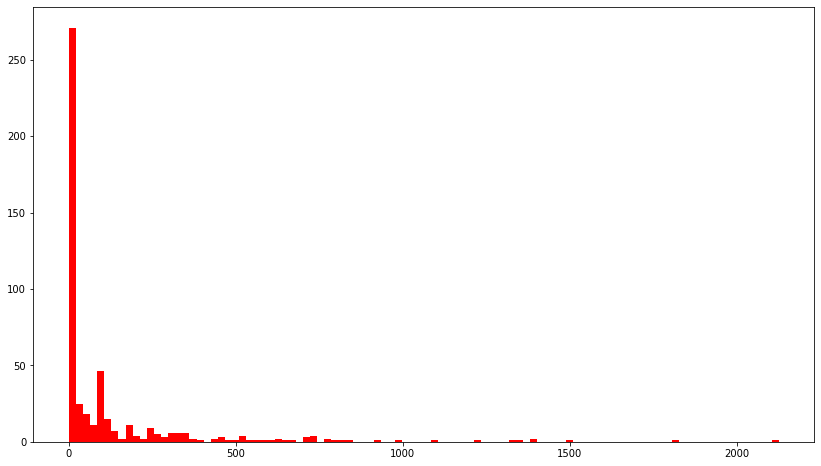

In [21]:
plt.hist(anomalies.Amount, bins = bins, color="red")
plt.show()

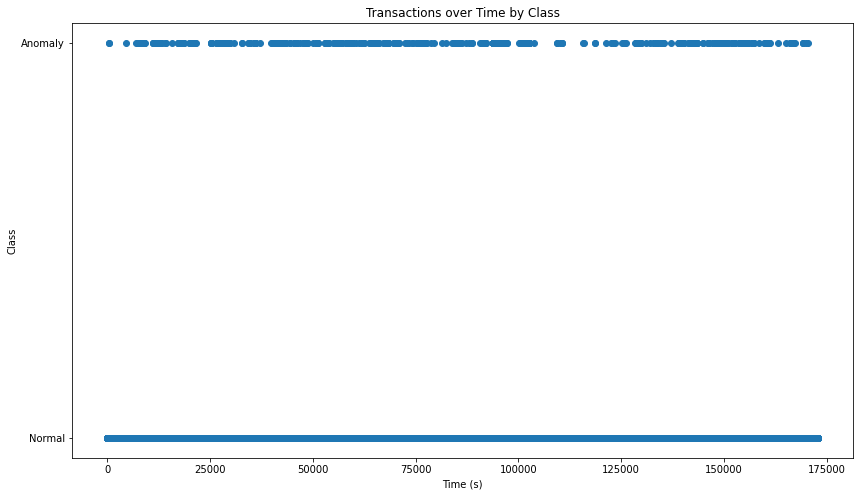

In [22]:
plt.scatter(df.Time, df.Class) 
plt.title("Transactions over Time by Class") 
plt.ylabel("Class")
plt.yticks(range(2), ["Normal", "Anomaly"]) 
plt.xlabel("Time (s)")
plt.show()

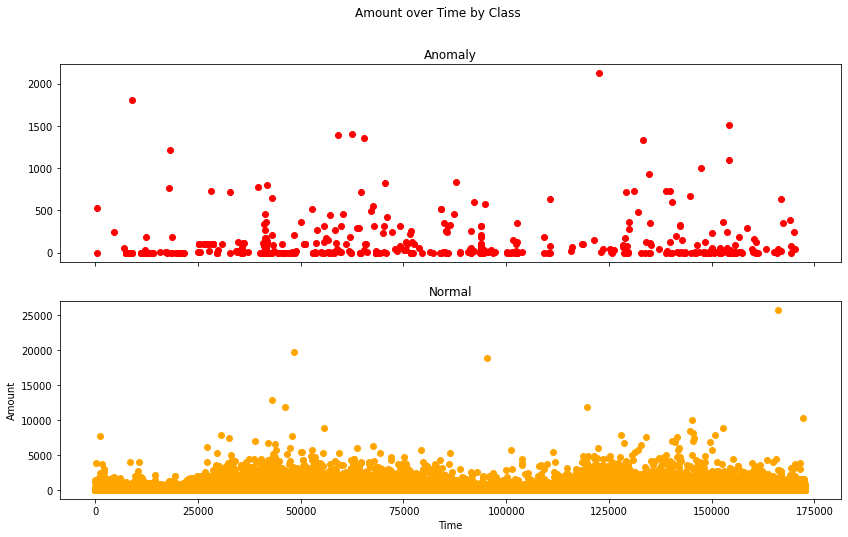

In [23]:
plot_scatter(df, "Time", "Amount")

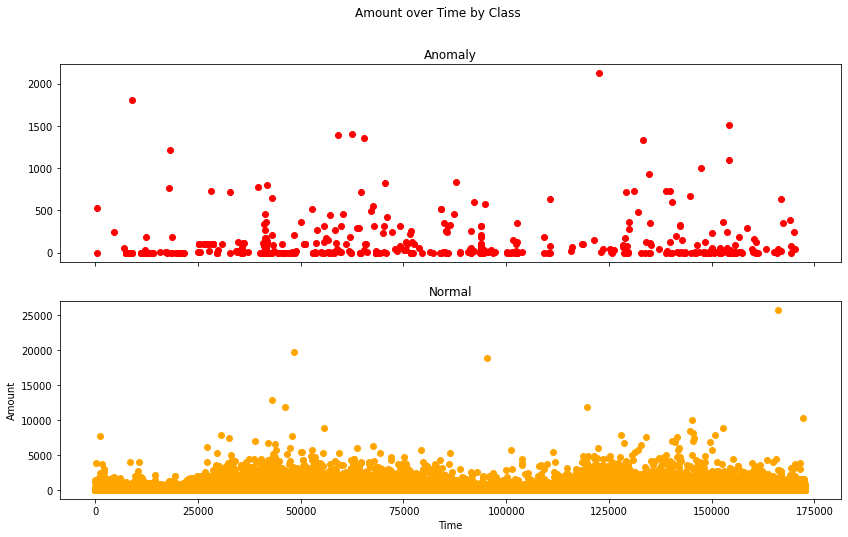

In [24]:
plot_scatter(df, "Time", "Amount")

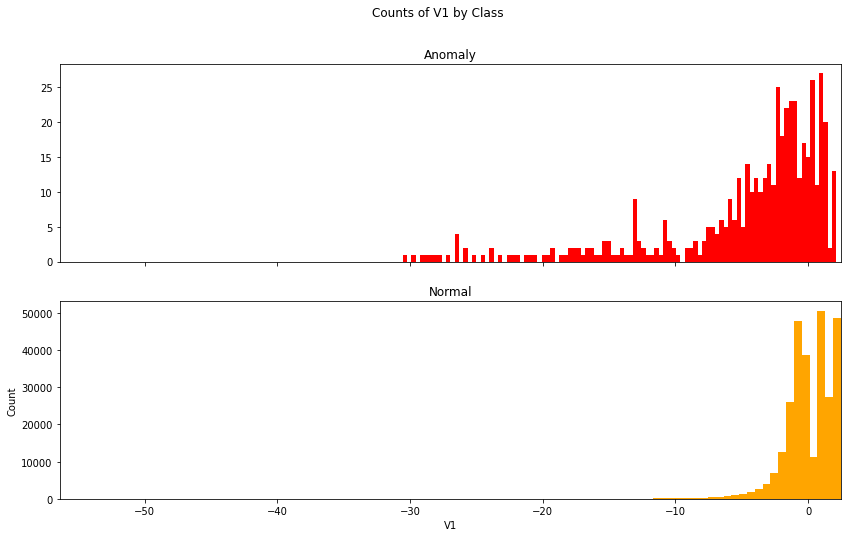

In [25]:
plot_histogram(df, bins, "V1")

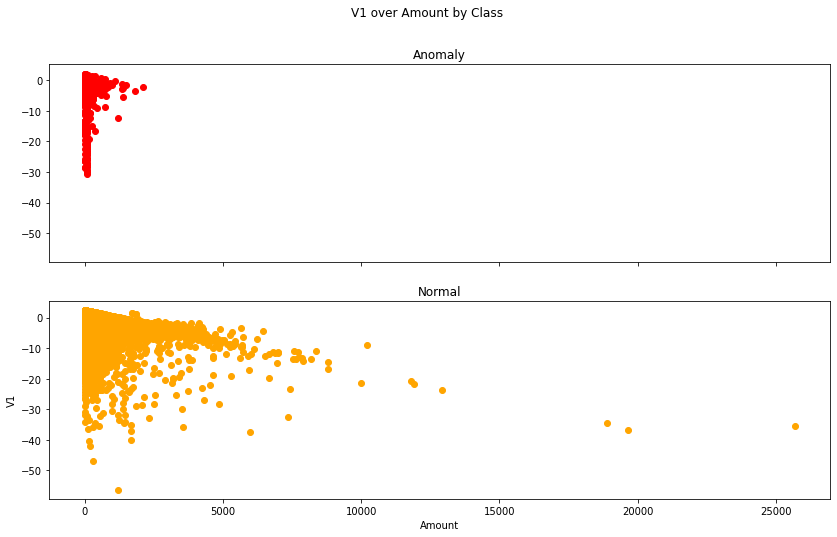

In [26]:
plot_scatter(df, "Amount", "V1", sharey=True)

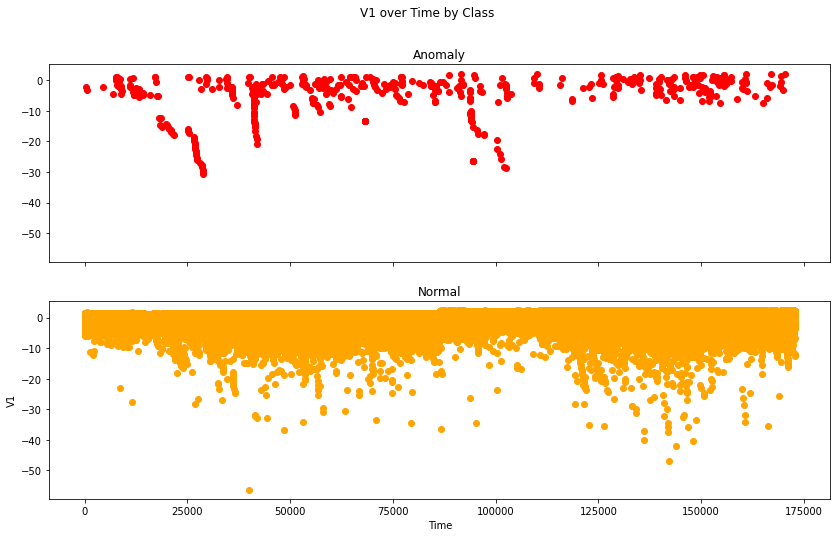

In [27]:
plot_scatter(df, "Time", "V1", sharey=True)

V1 Counts


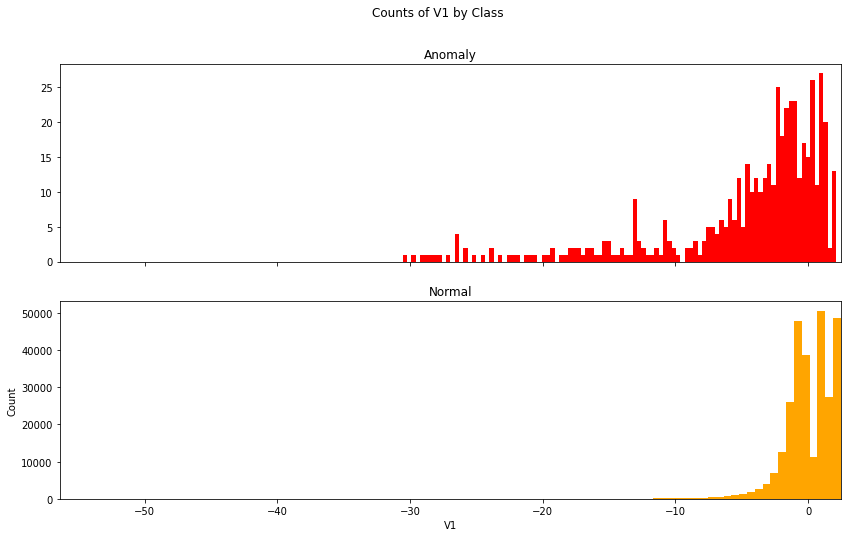

V2 Counts


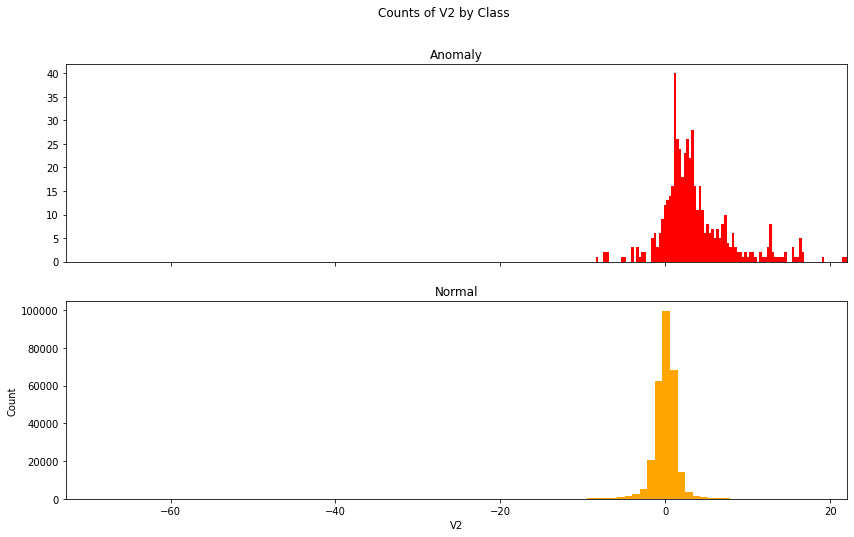

V3 Counts


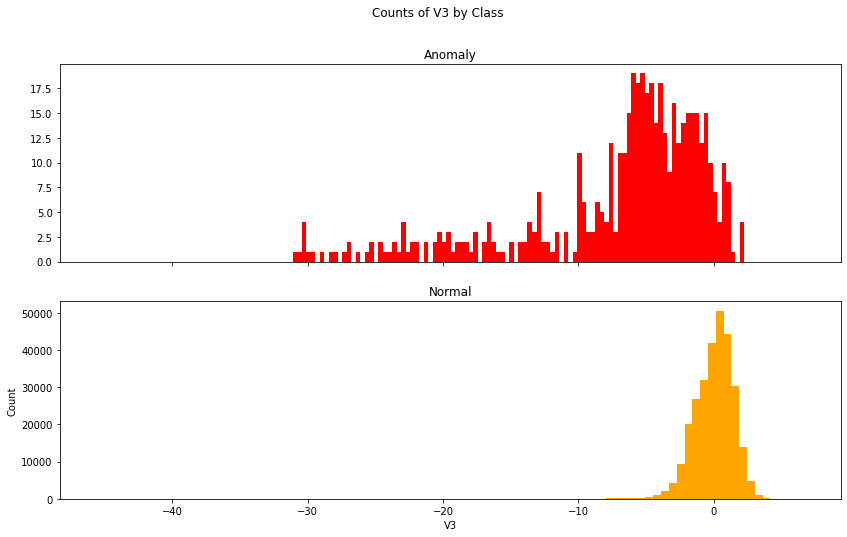

V4 Counts


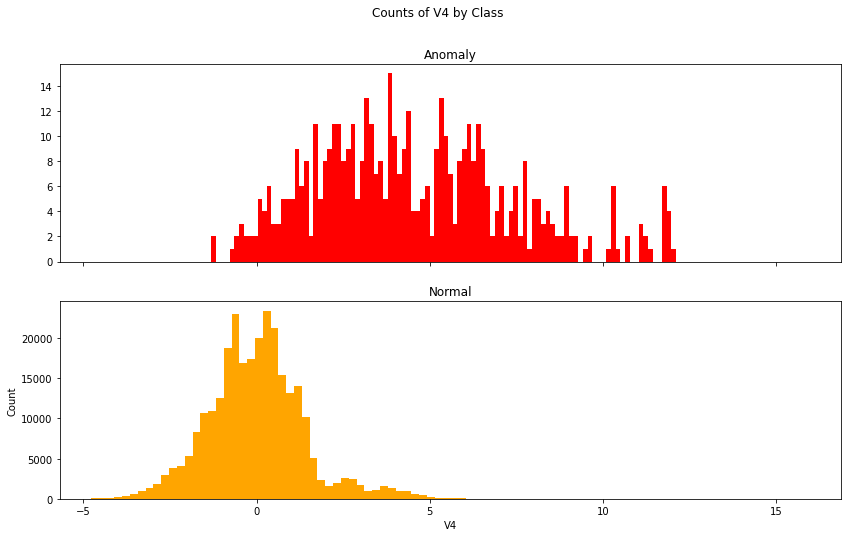

V5 Counts


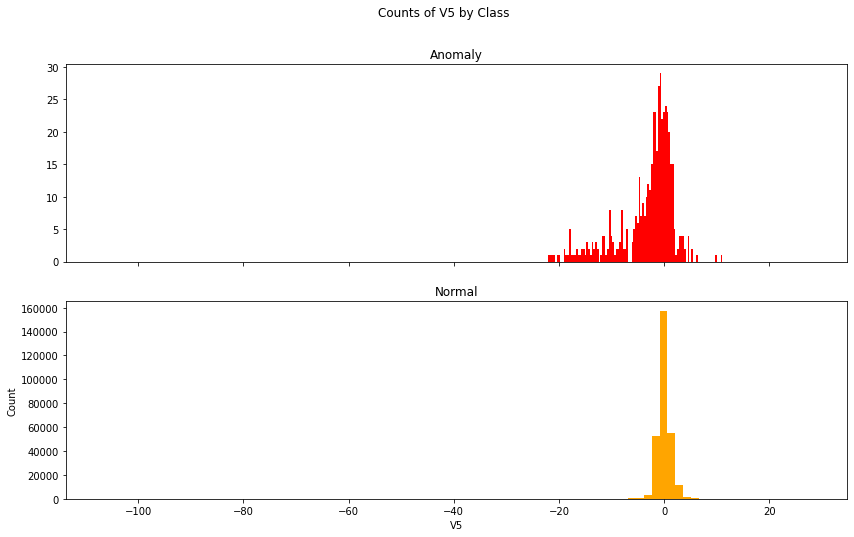

V6 Counts


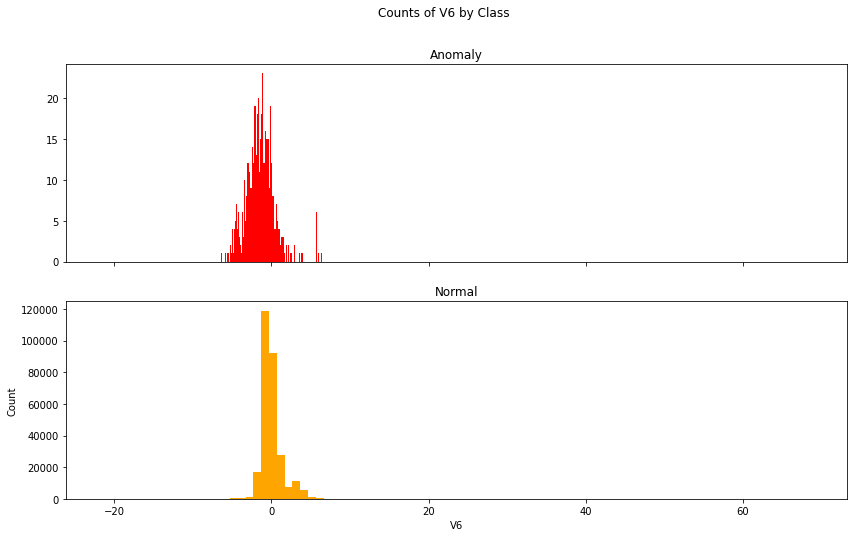

V7 Counts


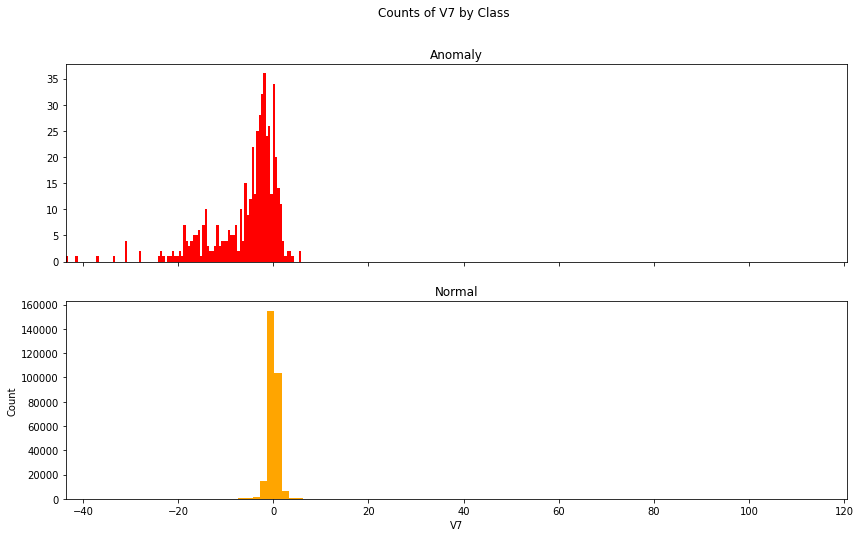

V8 Counts


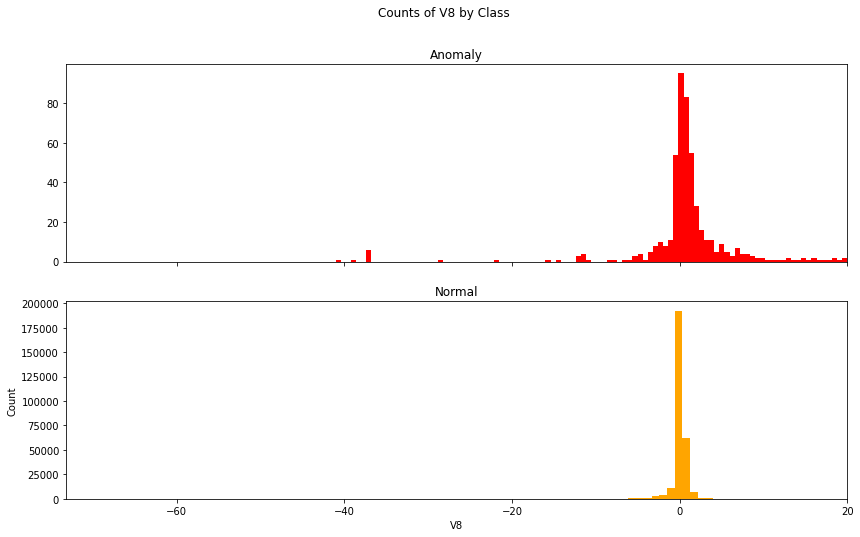

V9 Counts


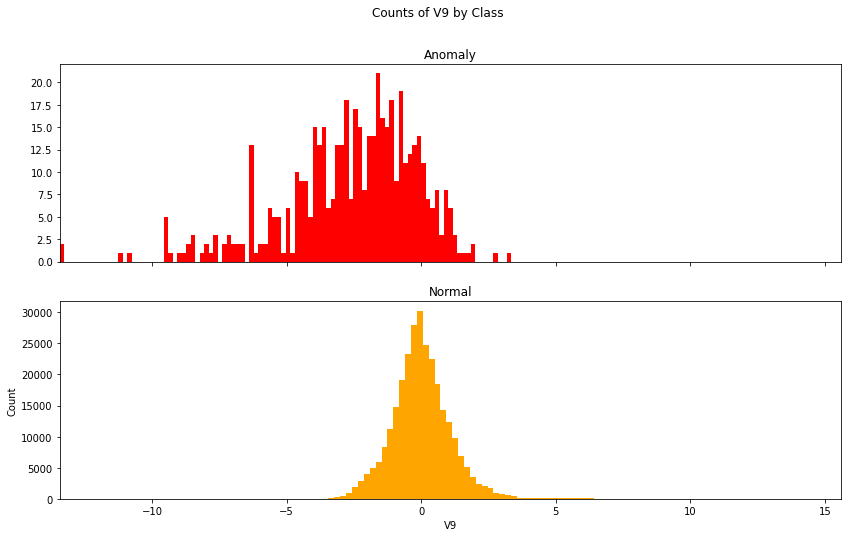

V10 Counts


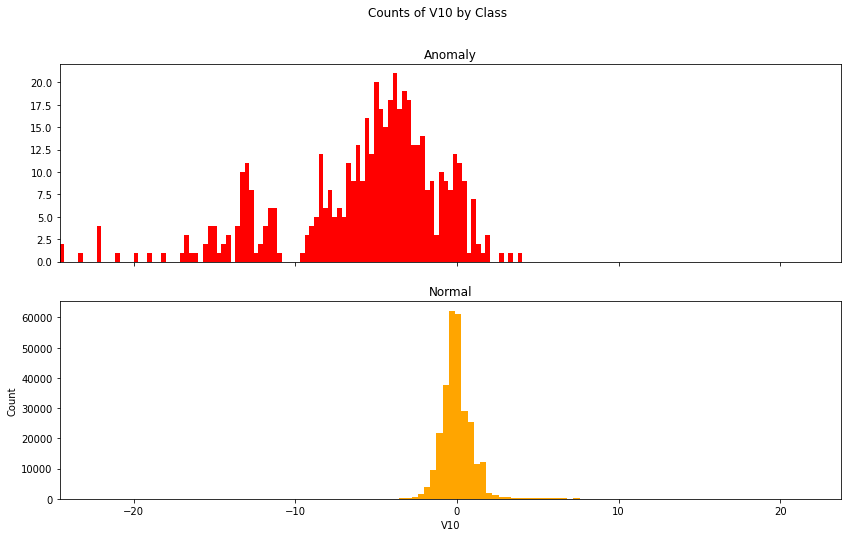

V11 Counts


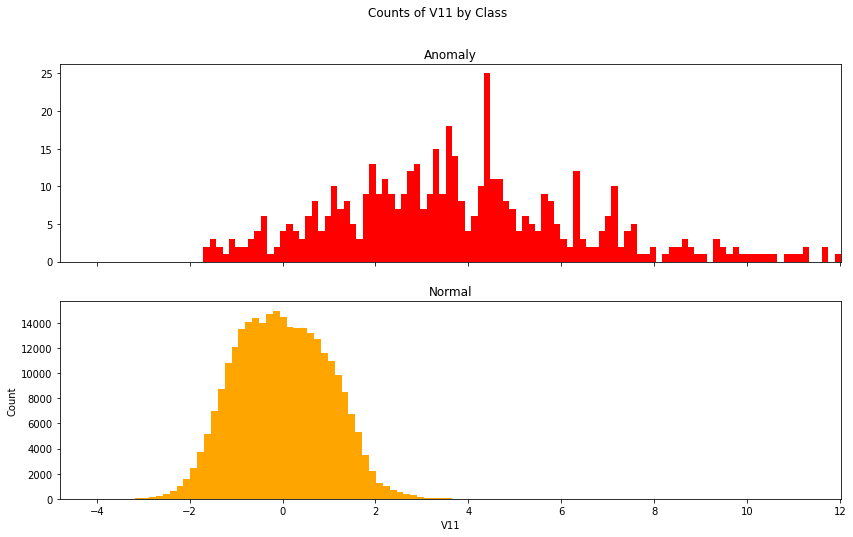

V12 Counts


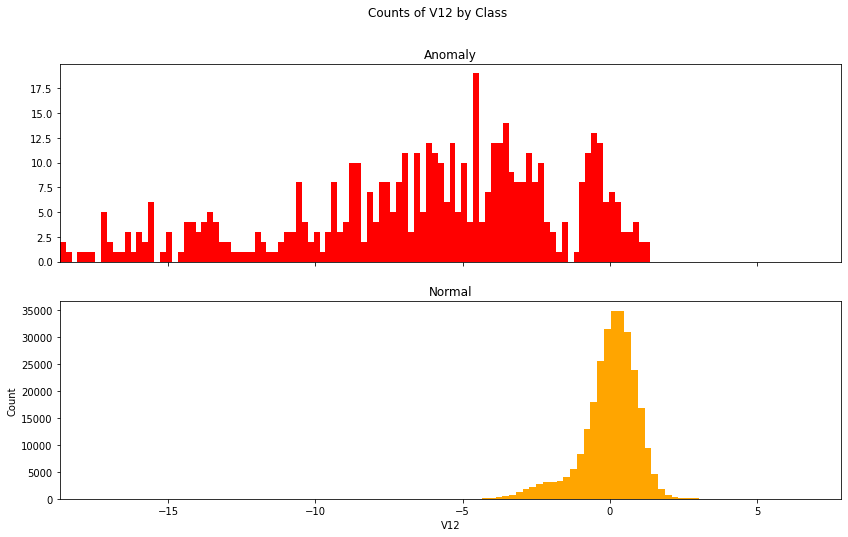

V13 Counts


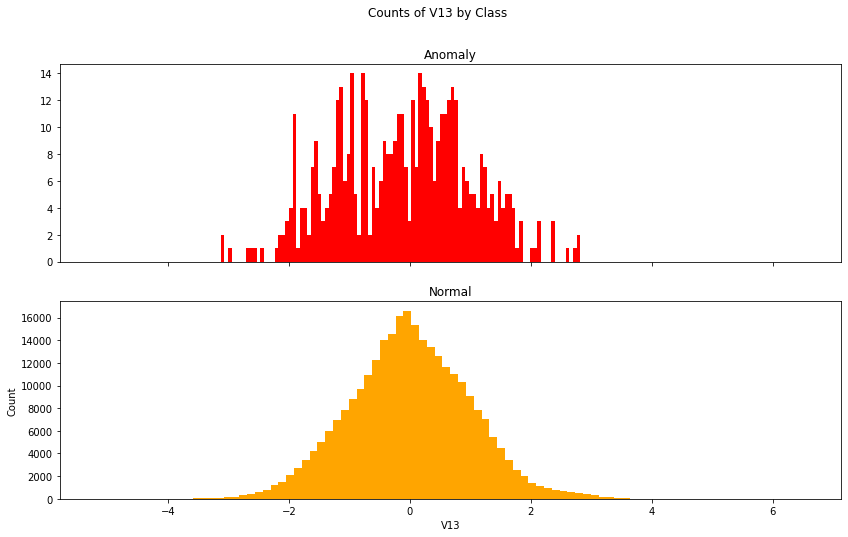

V14 Counts


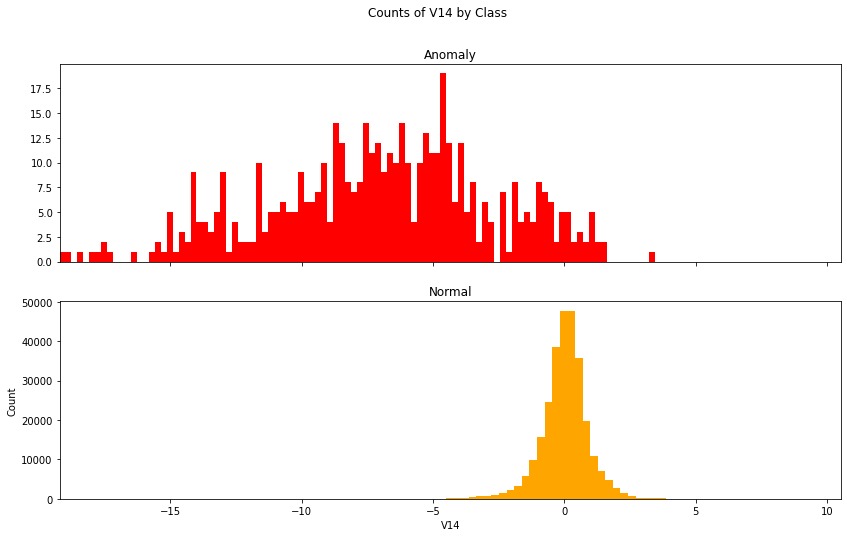

V15 Counts


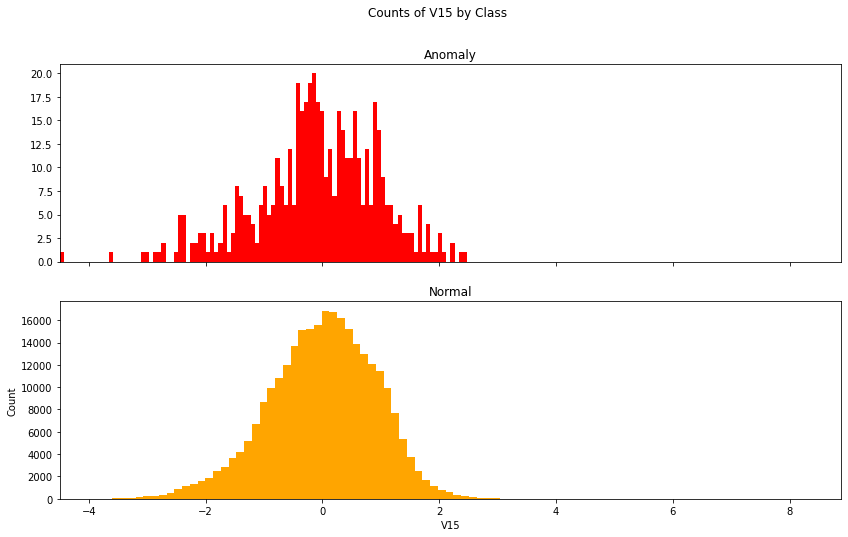

V16 Counts


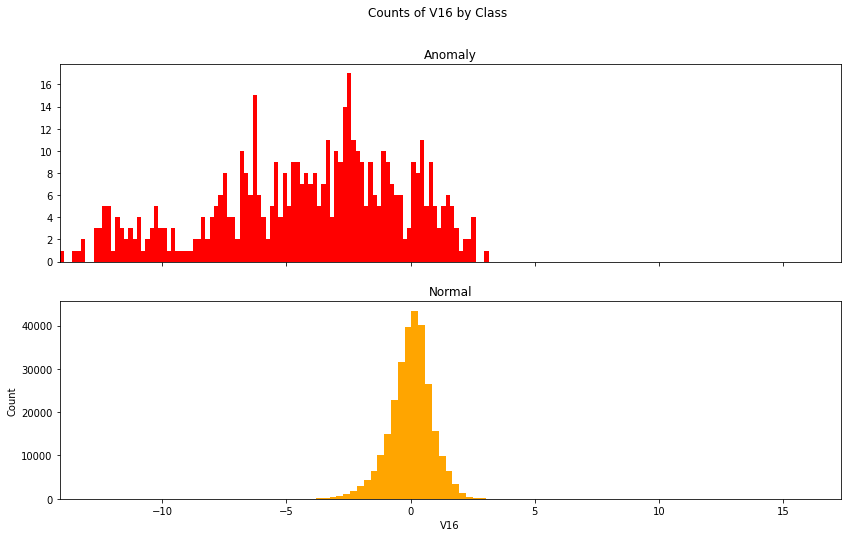

V17 Counts


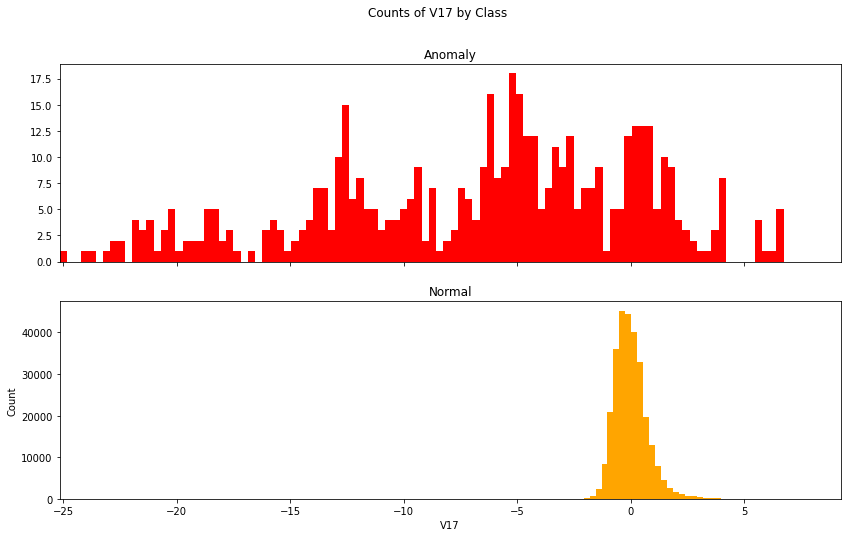

V18 Counts


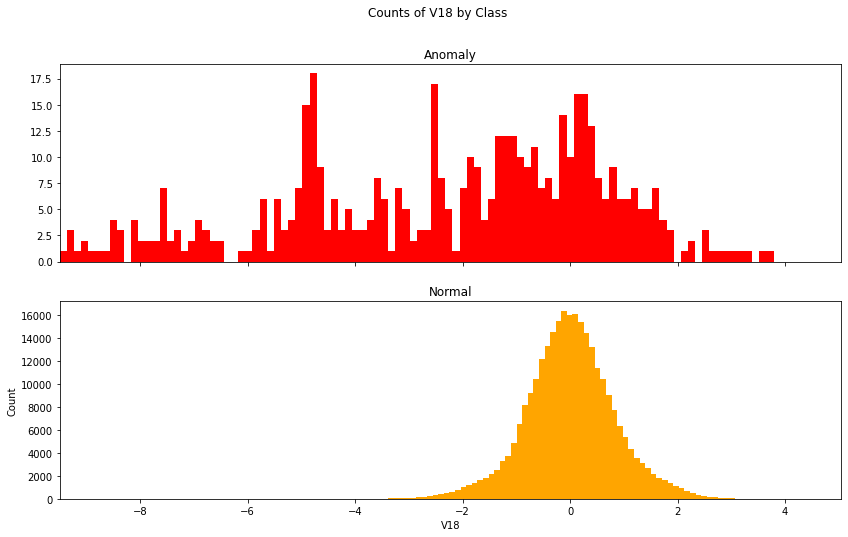

V19 Counts


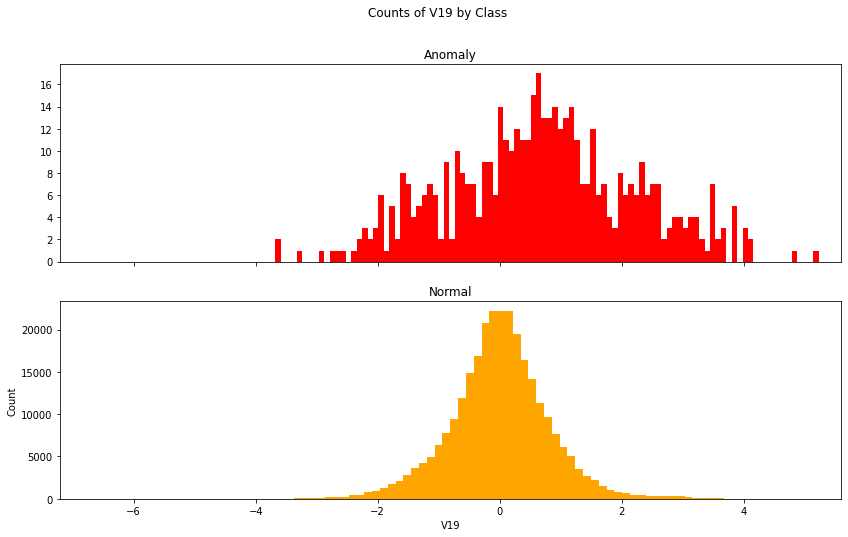

V20 Counts


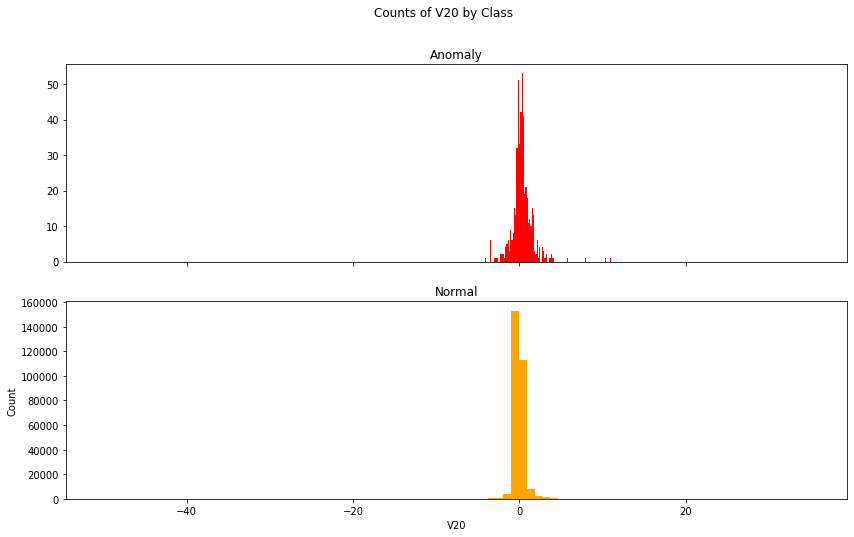

V21 Counts


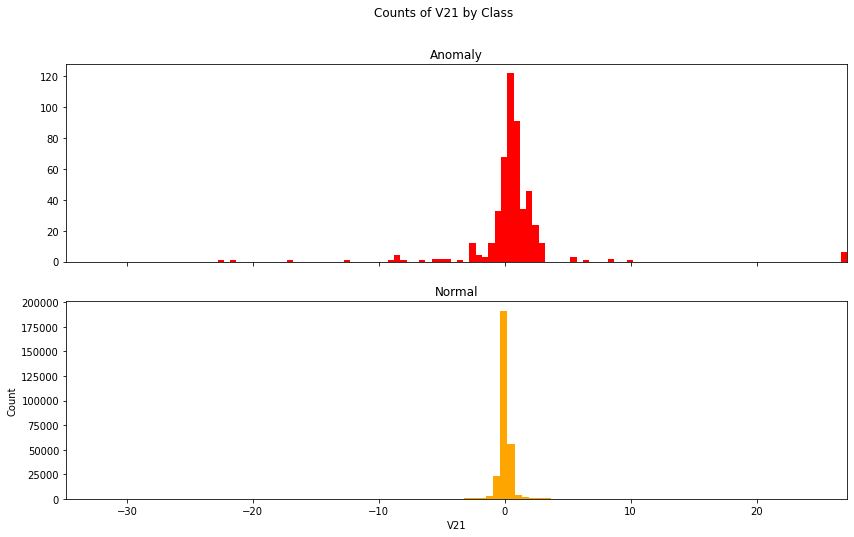

V22 Counts


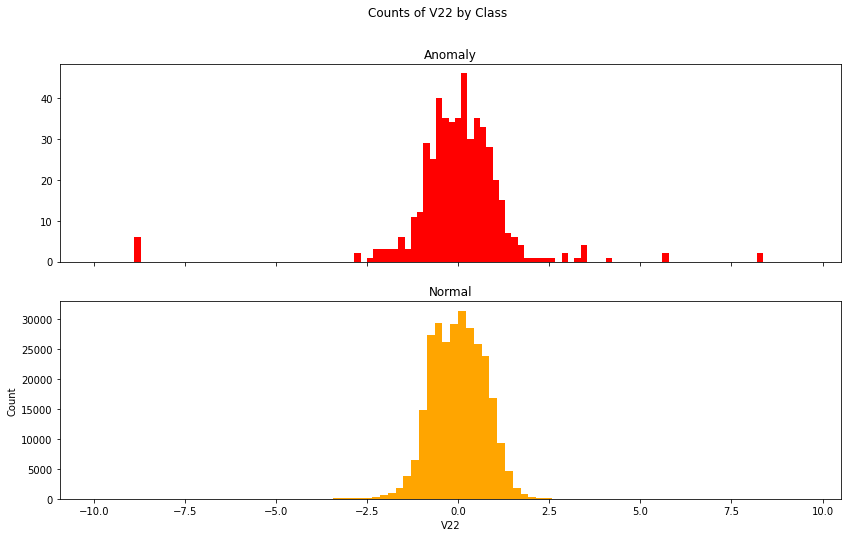

V23 Counts


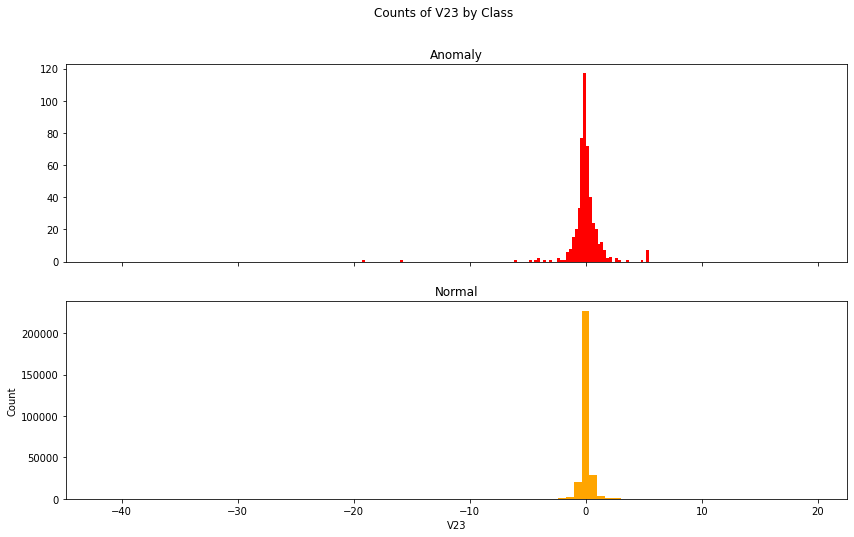

V24 Counts


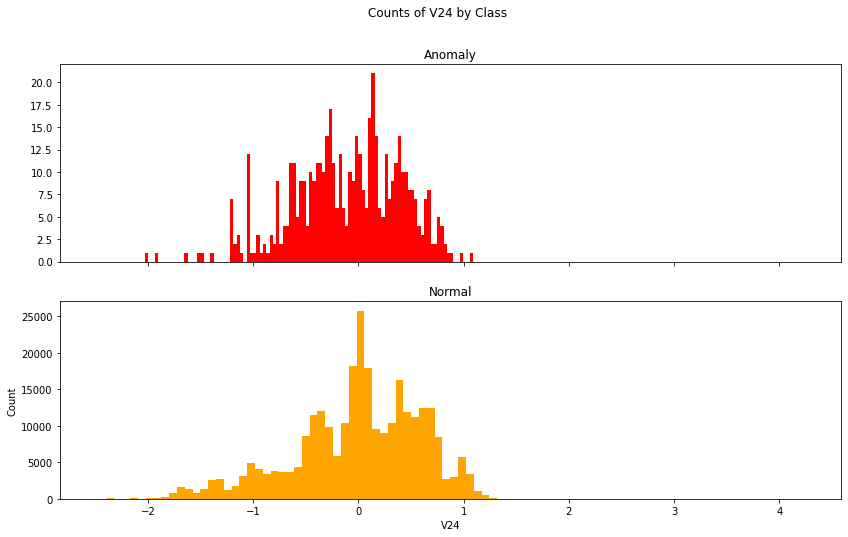

V25 Counts


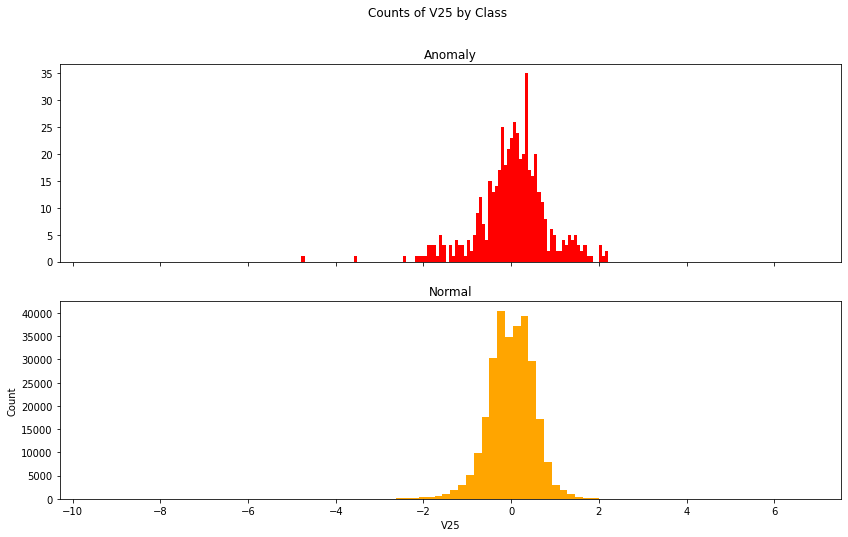

V26 Counts


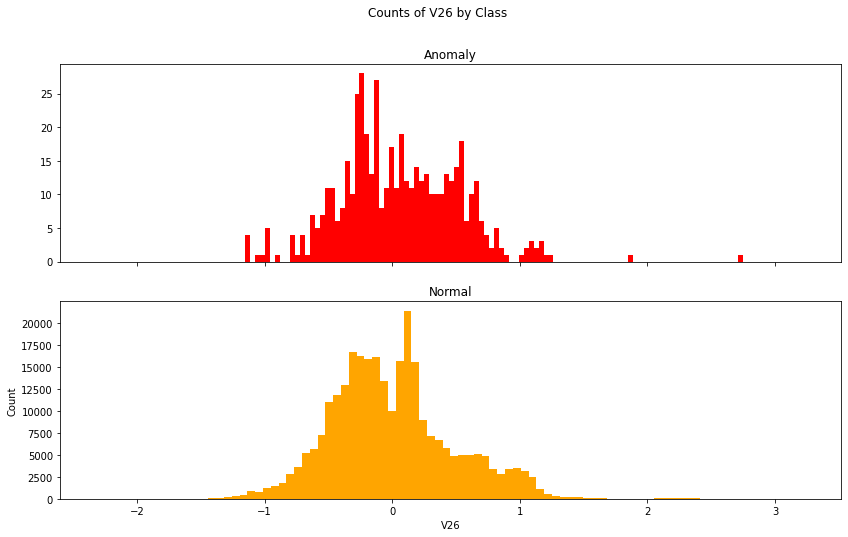

V27 Counts


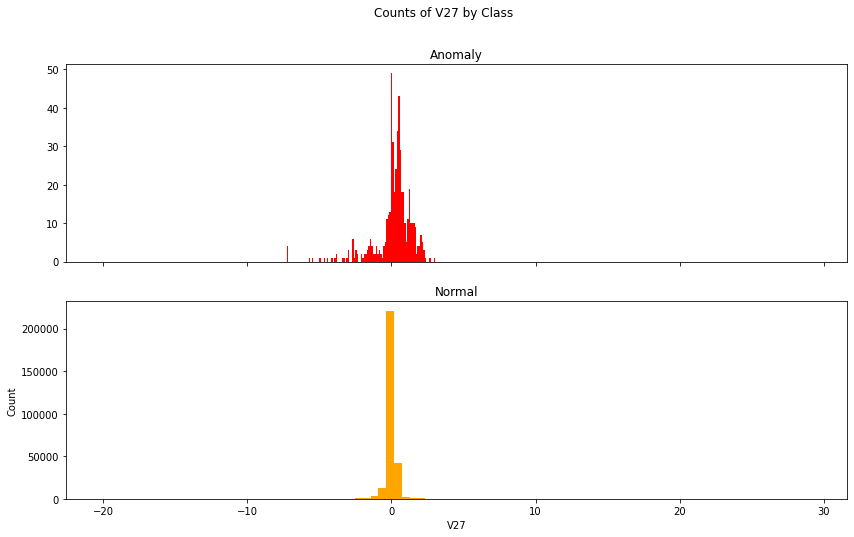

V28 Counts


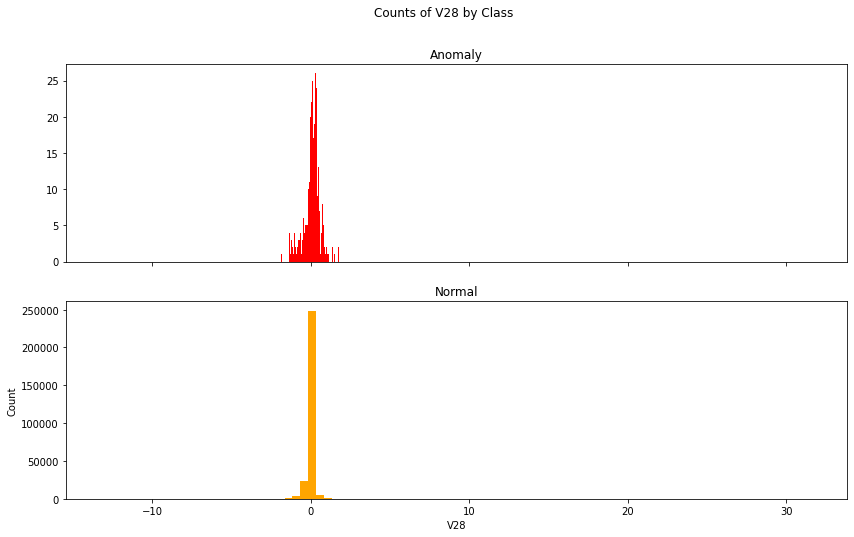

In [28]:
for f in range(1, 29):
    print(f'V{f} Counts')
    plot_histogram(df, bins, f'V{f}')

V1 vs Time


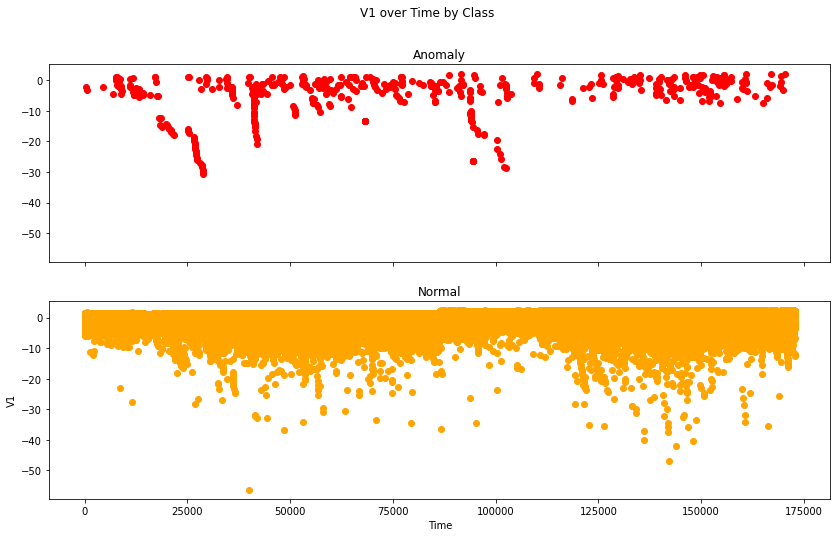

V2 vs Time


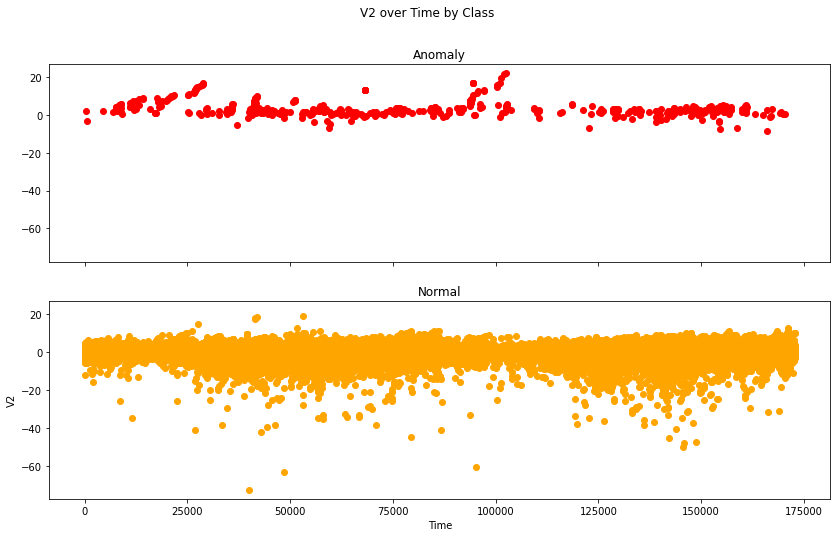

V3 vs Time


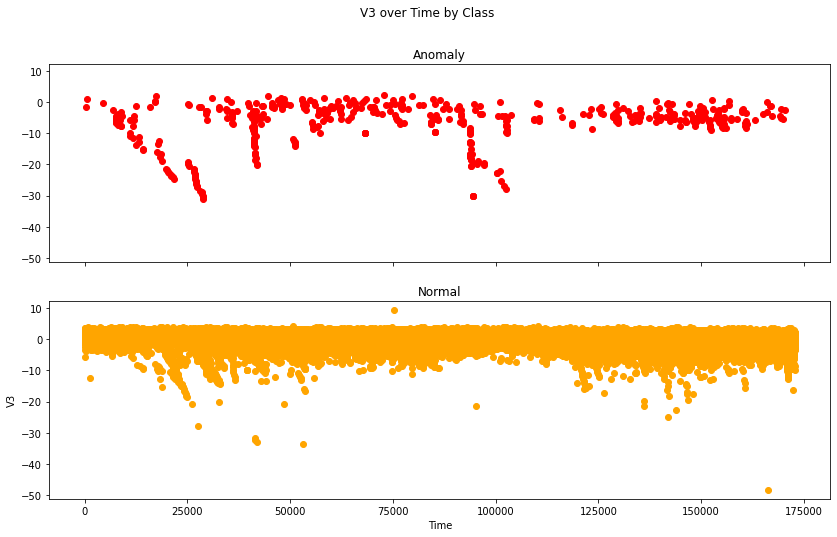

V4 vs Time


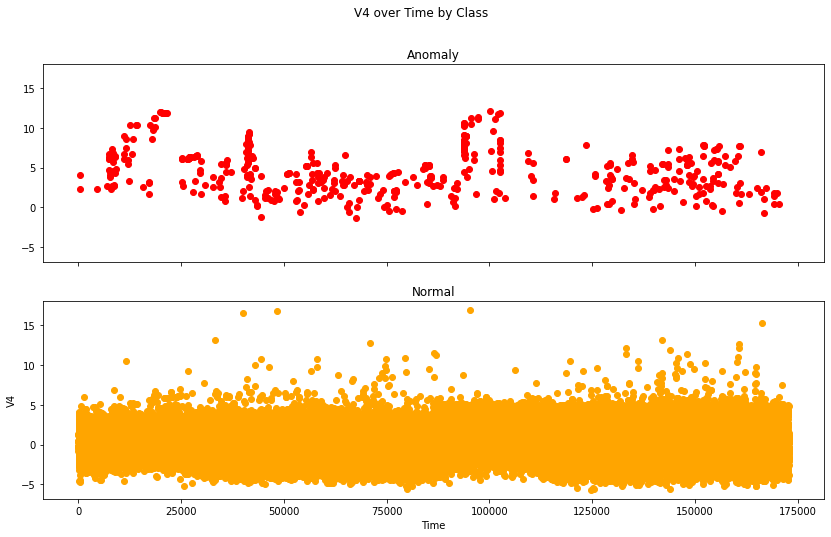

V5 vs Time


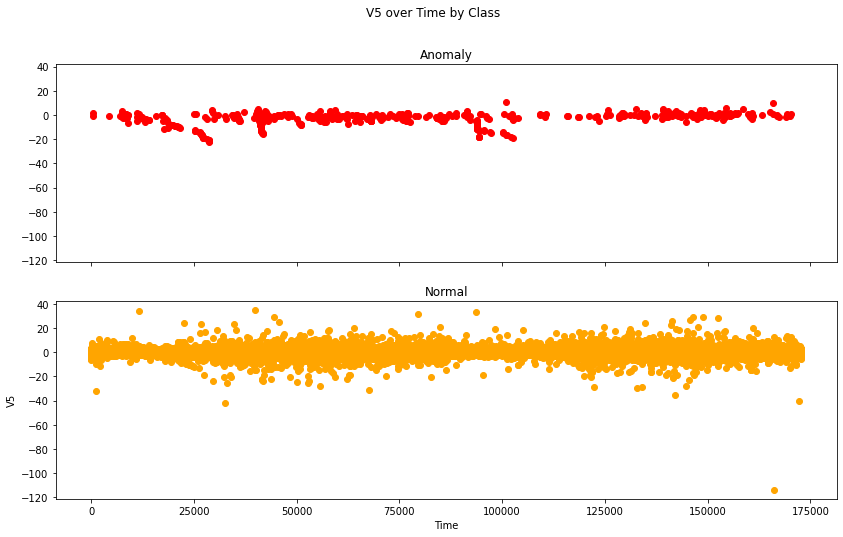

V6 vs Time


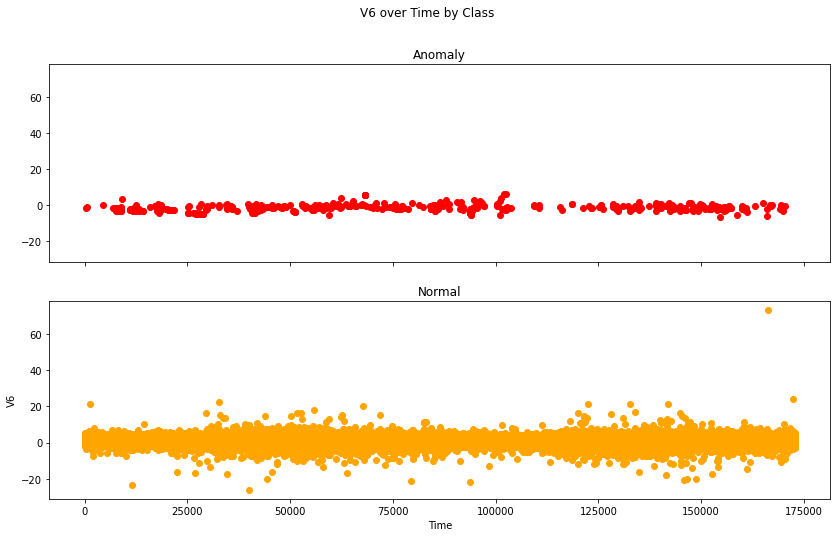

V7 vs Time


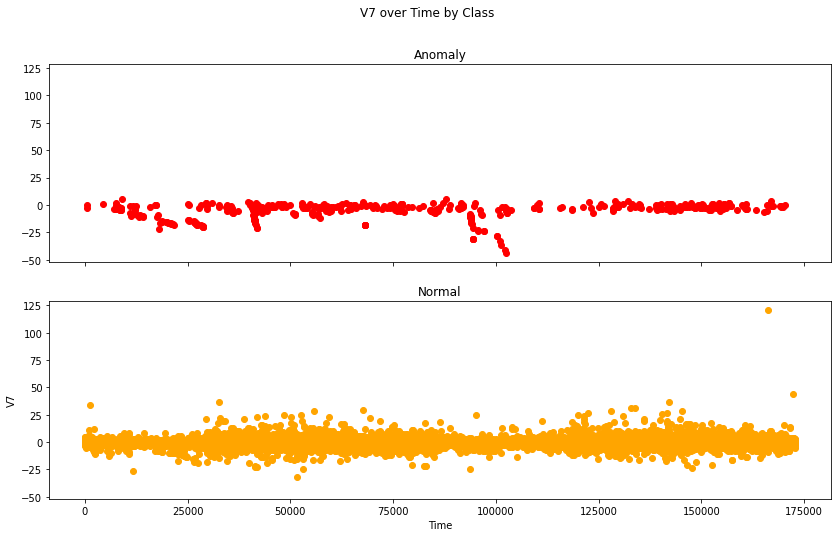

V8 vs Time


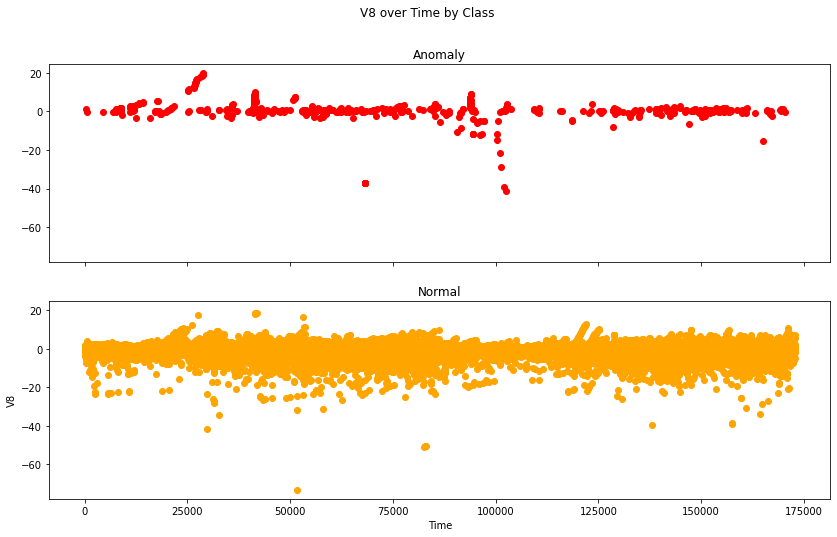

V9 vs Time


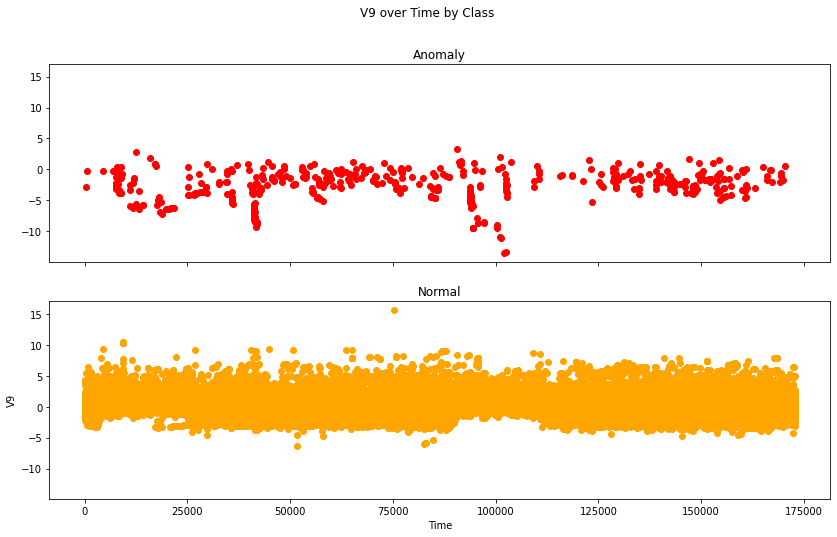

V10 vs Time


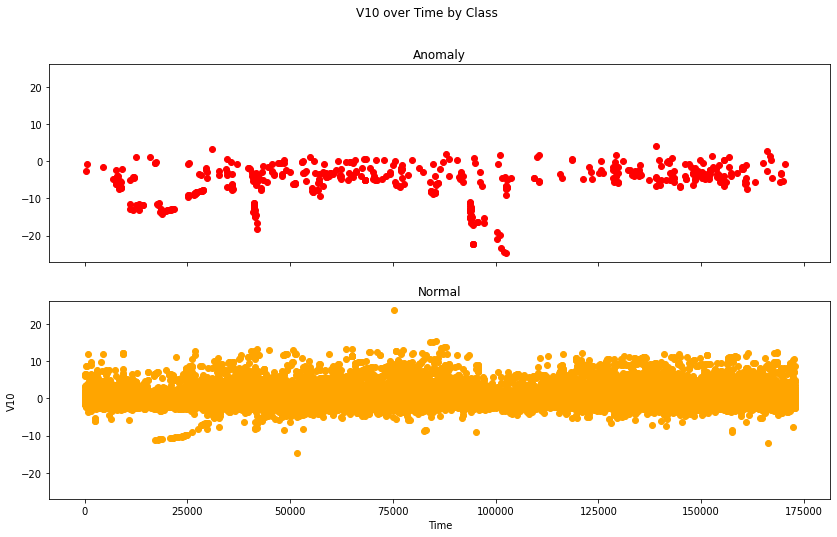

V11 vs Time


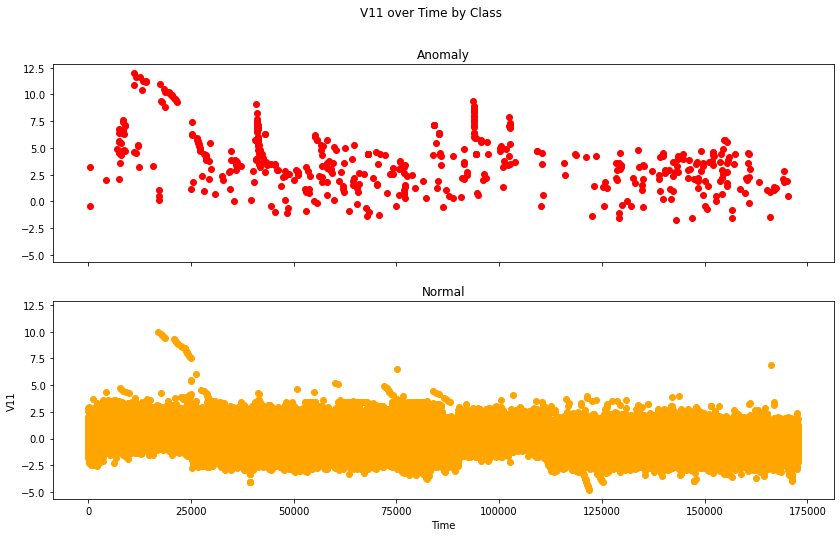

V12 vs Time


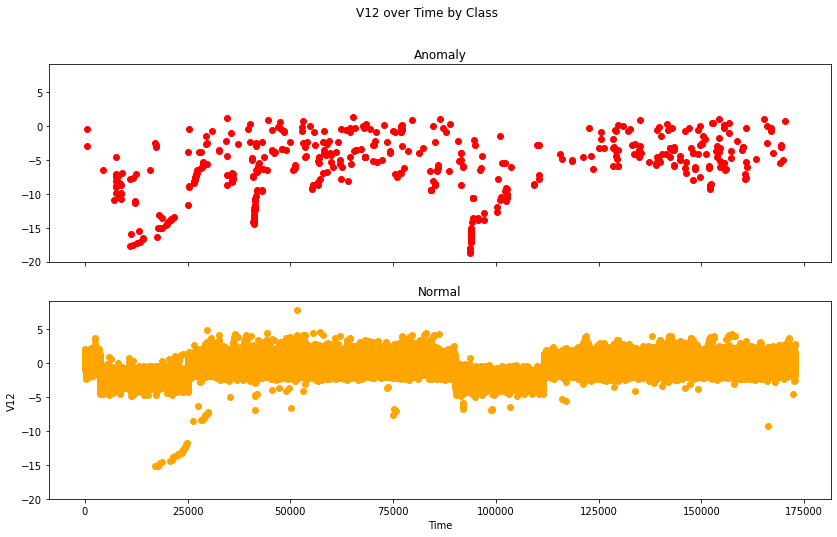

V13 vs Time


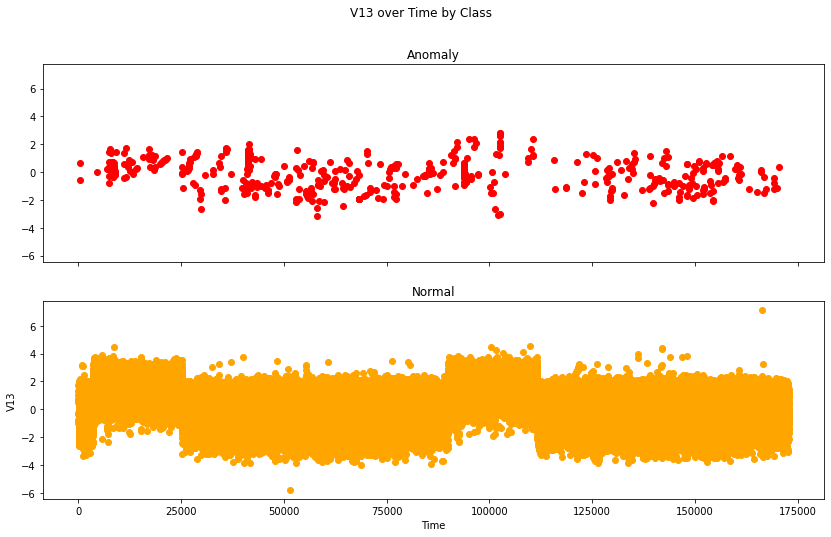

V14 vs Time


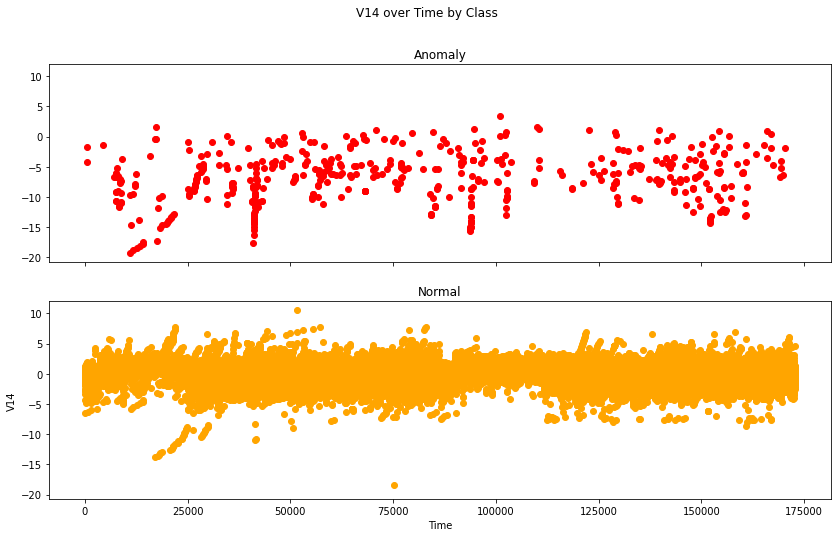

V15 vs Time


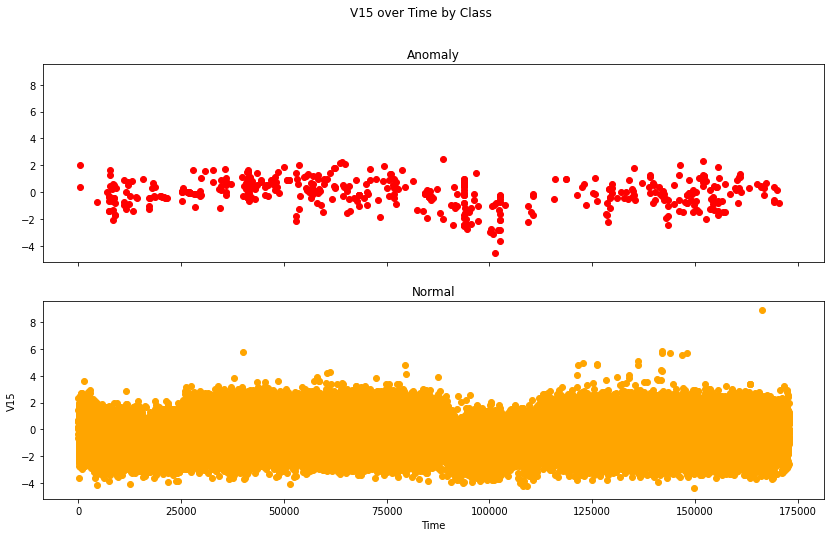

V16 vs Time


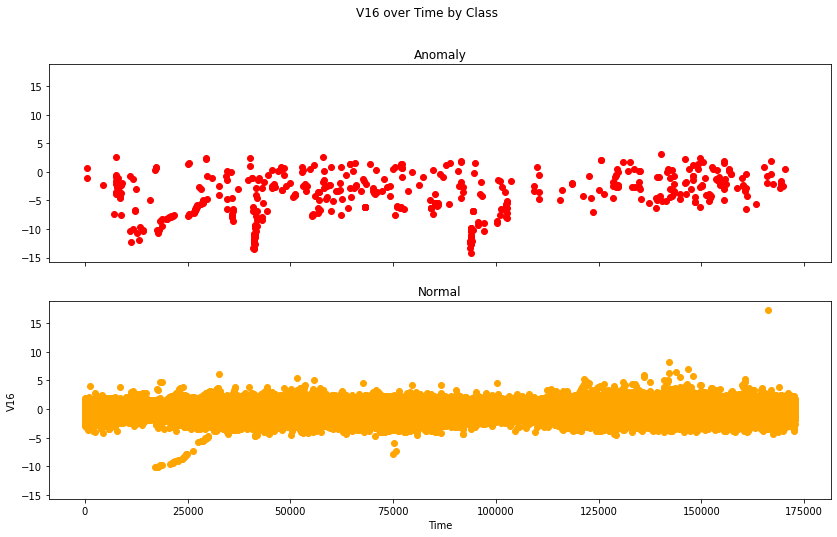

V17 vs Time


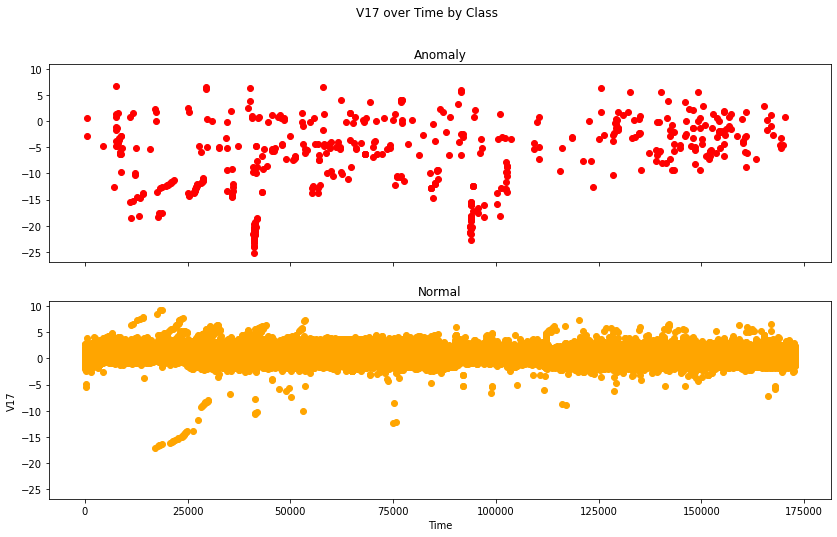

V18 vs Time


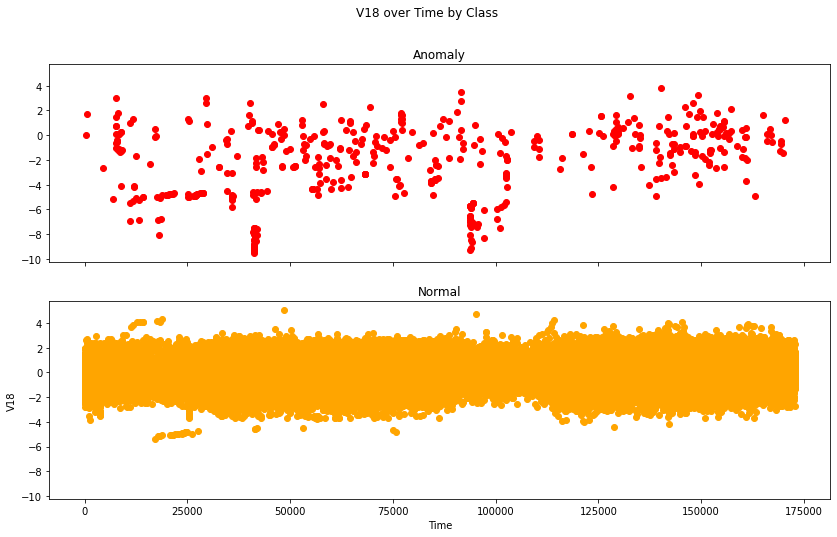

V19 vs Time


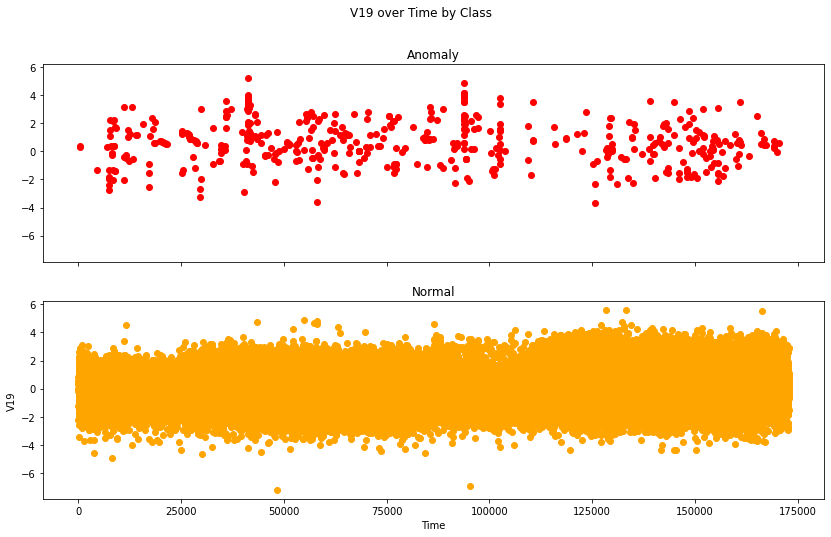

V20 vs Time


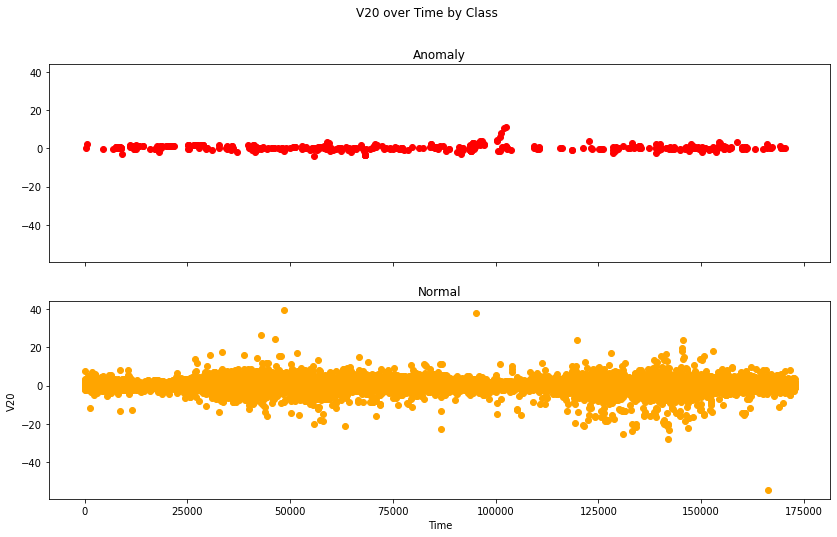

V21 vs Time


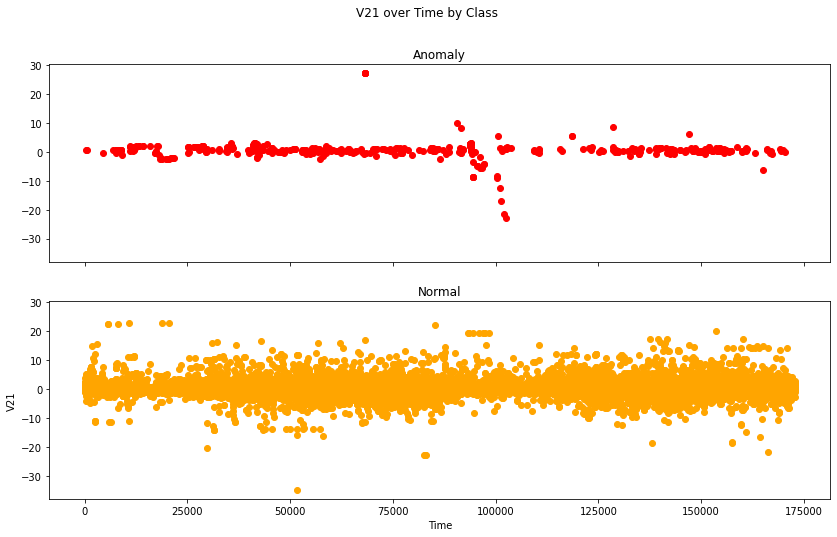

V22 vs Time


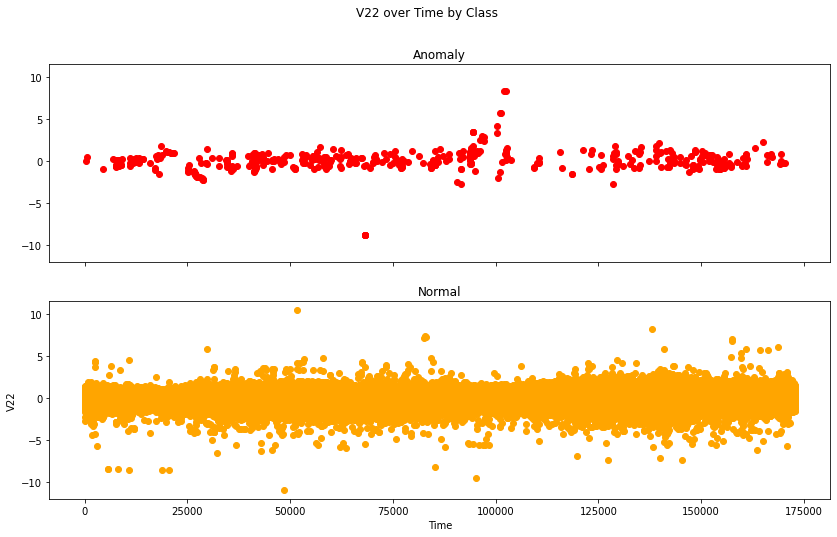

V23 vs Time


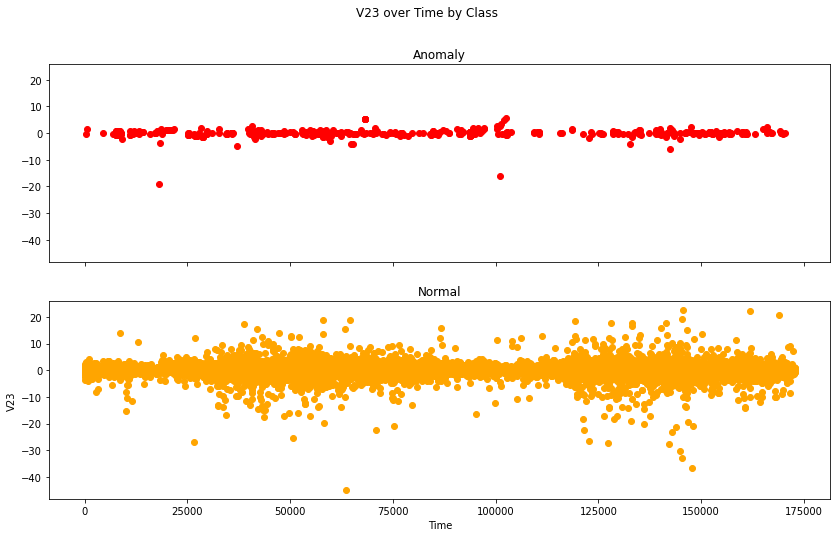

V24 vs Time


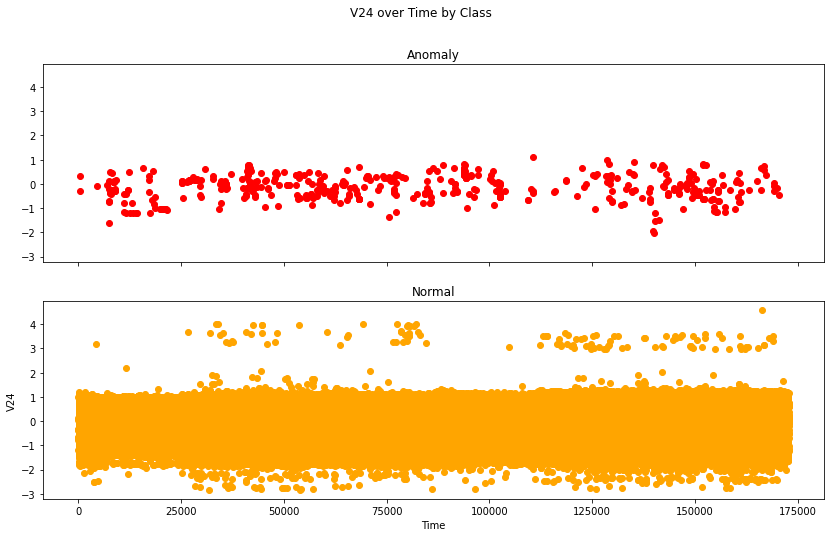

V25 vs Time


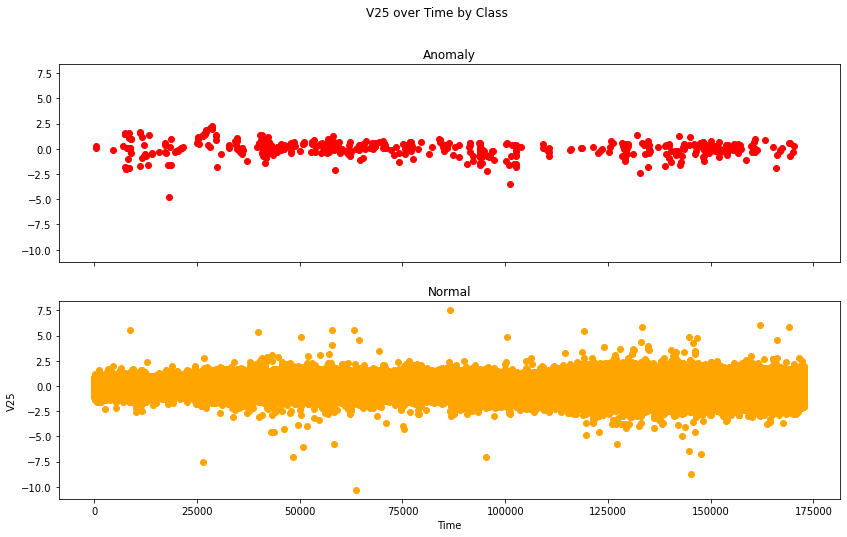

V26 vs Time


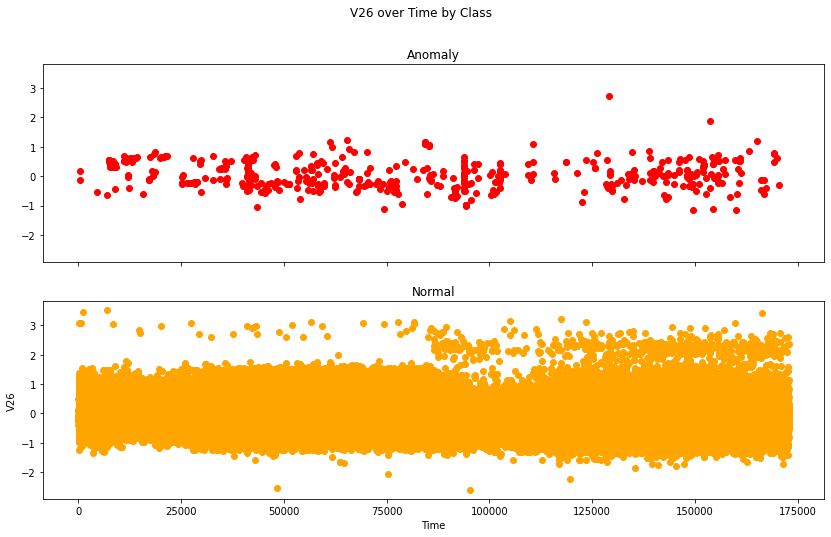

V27 vs Time


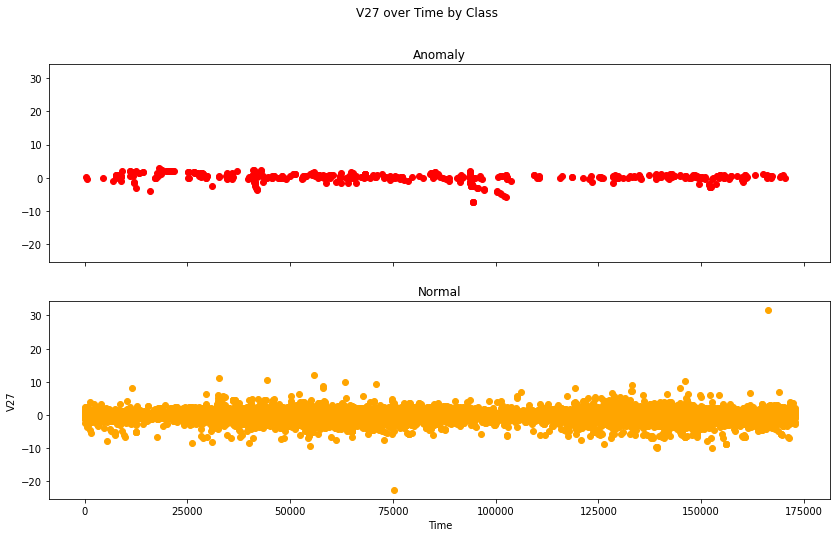

V28 vs Time


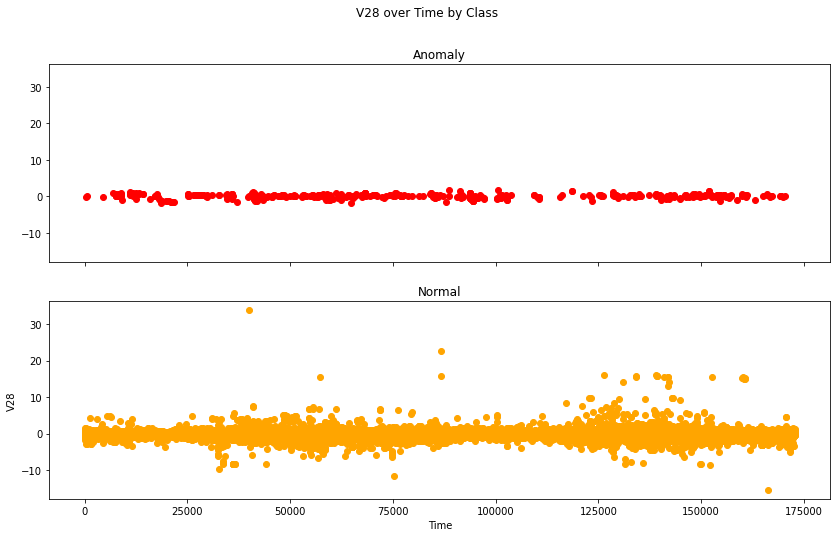

In [29]:
for f in range(1, 29):
    print(f'V{f} vs Time')
    plot_scatter(df, "Time", f'V{f}', sharey=True)


## Build Models

In [31]:
import numpy as np
import pandas as pd
import matplotlib #
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn #
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve, confusion_matrix
from sklearn.model_selection import KFold

print("numpy: {}".format(np.__version__))
print("pandas: {}".format(pd.__version__))
print("matplotlib: {}".format(matplotlib.__version__))
print("seaborn: {}".format(sns.__version__))
print("sklearn: {}".format(sklearn.__version__))

numpy: 1.21.2
pandas: 1.3.2
matplotlib: 3.4.3
seaborn: 0.11.2
sklearn: 0.24.2


In [32]:
anomalies = df[df.Class == 1]
normal = df[df.Class == 0]

print(f"Anomalies: {anomalies.shape}")
print(f"Normal: {normal.shape}")

Anomalies: (492, 31)
Normal: (284315, 31)


In [33]:
normal = df[df.Class == 0].sample(frac=0.5, random_state=2020). reset_index(drop=True)
anomaly = df[df.Class == 1]

print(f"Anomalies: {anomalies.shape}")
print(f"Normal: {normal.shape}")

Anomalies: (492, 31)
Normal: (142158, 31)


In [35]:
normal_train, normal_test = train_test_split(normal, test_size = 0.2, random_state = 2020)
anomaly_train, anomaly_test = train_test_split(anomaly, test_size = 0.2, random_state = 2020)

In [38]:
normal_train.shape, normal_test.shape

((113726, 31), (28432, 31))

In [50]:
anomaly_validate.shape, anomaly_test.shape

((99, 31), (99, 31))

In [40]:
normal_train, normal_validate = train_test_split(normal_train, test_size = 0.25, random_state = 2020)
anomaly_train, anomaly_validate = train_test_split(anomaly_train, test_size = 0.25, random_state = 2020)

In [49]:
normal_validate.shape, anomaly_train.shape

((28432, 31), (294, 31))

In [41]:
x_train = pd.concat((normal_train, anomaly_train))
x_test = pd.concat((normal_test, anomaly_test))
x_validate = pd.concat((normal_validate, anomaly_validate))

In [43]:
y_train = np.array(x_train["Class"])
y_test = np.array(x_test["Class"])
y_validate = np.array(x_validate["Class"])

In [44]:
x_train = x_train.drop("Class", axis=1)
x_test = x_test.drop("Class", axis=1)
x_validate = x_validate.drop("Class", axis=1)

In [45]:
print("Training sets:\nx_train: {} y_train: {}".format(x_train.shape, y_train.shape))
print("\nTesting sets:\nx_test: {} y_test: {}".format(x_test.shape, y_test.shape))
print("\nValidation sets:\nx_validate: {} y_validate:{}".format(x_validate.shape, y_validate.shape))

Training sets:
x_train: (85588, 30) y_train: (85588,)

Testing sets:
x_test: (28531, 30) y_test: (28531,)

Validation sets:
x_validate: (28531, 30) y_validate:(28531,)


Printing the output of the different sets. The three sets should comprise 60%, 20%, and 20% of the original union of the normal and anomaly sets

In [52]:
scaler = StandardScaler()
scaler.fit(pd.concat((normal, anomaly)).drop("Class", axis=1))
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_validate = scaler.transform(x_validate)

In [53]:
sk_model = LogisticRegression(random_state=None, max_iter=400, solver='newton-cg').fit(x_train, y_train)

In [54]:
eval_acc = sk_model.score(x_test, y_test)

In [55]:
preds = sk_model.predict(x_test)
auc_score = roc_auc_score(y_test, preds)

print(f"Auc Score: {auc_score:.3%}")
print(f"Eval Accuracy: {eval_acc:.3%}")

Auc Score: 84.331%
Eval Accuracy: 99.867%


In [59]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.91      0.69      0.78        99

    accuracy                           1.00     28531
   macro avg       0.95      0.84      0.89     28531
weighted avg       1.00      1.00      1.00     28531



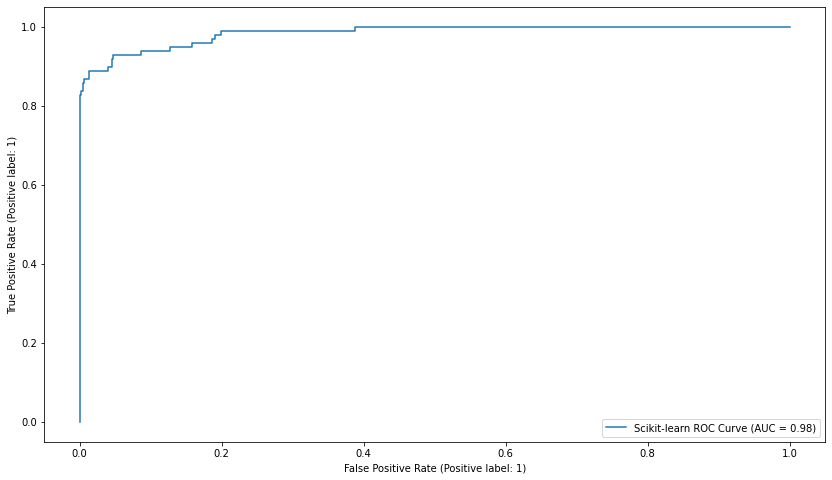

In [56]:
roc_plot = plot_roc_curve(sk_model, x_test, y_test, name='Scikit-learn ROC Curve')

Text(0.5, 51.0, 'Predicted')

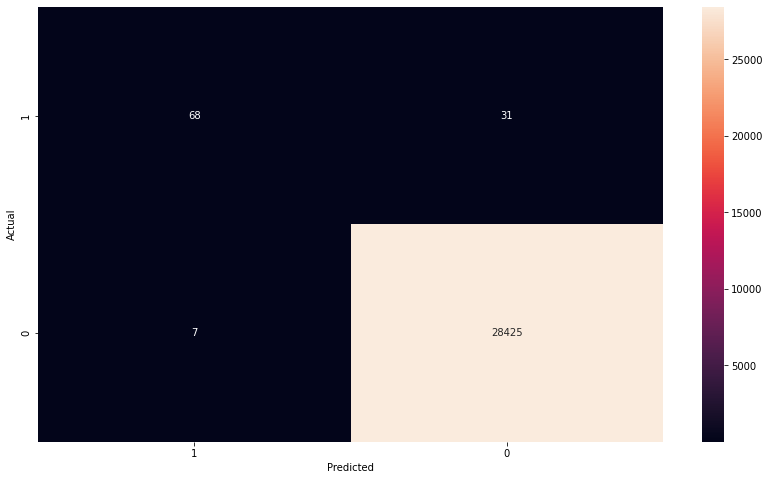

In [60]:
conf_matrix = confusion_matrix(y_test, preds)
ax = sns.heatmap(conf_matrix, annot=True,fmt='g')
ax.invert_xaxis()
ax.invert_yaxis()
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [62]:
# Model Validation

anomaly_weights = [1, 5, 10, 15]

num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=2020)

In [68]:
logs = []

for f in range(len(anomaly_weights)): 
    fold = 1
    accuracies = []
    auc_scores= []
    
    for train, test in kfold.split(x_validate, y_validate):
        weight = anomaly_weights[f]
        class_weights= {
            0:1,
            1: weight 
        }
        
        sk_model = LogisticRegression(random_state=None, max_iter=400,
                                      solver='newton-cg',
                                      class_weight=class_weights).fit(x_validate[train],y_validate[train])
    
        for h in range(40): print('-', end="")
        print(f"\nfold {fold}\nAnomaly Weight: {weight}")
    
        eval_acc = sk_model.score(x_validate[test], y_validate[test])
        preds = sk_model.predict(x_validate[test])
    
        try:
            auc_score = roc_auc_score(y_validate[test], preds)
        except:
            auc_score = -1
        
        print("AUC: {}\neval_acc: {}".format(auc_score, eval_acc))
    
        accuracies.append(eval_acc)
        auc_scores.append(auc_score)
    
        log = [sk_model, x_validate[test], y_validate[test], preds]
        logs.append(log)
        
        fold = fold + 1
        
    print("\nAverages: ")
    print("Accuracy: ", np.mean(accuracies))
    print("AUC: ", np.mean(auc_scores))
    
    print("Best: ")
    print("Accuracy: ", np.max(accuracies))
    print("AUC: ", np.max(auc_scores))

----------------------------------------
fold 1
Anomaly Weight: 1
AUC: 0.8
eval_acc: 0.9985982127212195
----------------------------------------
fold 2
Anomaly Weight: 1
AUC: 0.8568790049001132
eval_acc: 0.998422712933754
----------------------------------------
fold 3
Anomaly Weight: 1
AUC: 0.8179179195189047
eval_acc: 0.9980722046968104
----------------------------------------
fold 4
Anomaly Weight: 1
AUC: 0.8682452129973255
eval_acc: 0.9987732211706976
----------------------------------------
fold 5
Anomaly Weight: 1
AUC: 0.8528532875621686
eval_acc: 0.9989484752891693

Averages: 
Accuracy:  0.9985629653623302
AUC:  0.8391790849957024
Best: 
Accuracy:  0.9989484752891693
AUC:  0.8682452129973255
----------------------------------------
fold 1
Anomaly Weight: 5
AUC: 0.8748241603657465
eval_acc: 0.9987734361310671
----------------------------------------
fold 2
Anomaly Weight: 5
AUC: 0.9515893956527202
eval_acc: 0.9980722046968104
----------------------------------------
fold 3
Anomal

In [73]:
logs[11]

[LogisticRegression(class_weight={0: 1, 1: 10}, max_iter=400, solver='newton-cg'),
 array([[ 0.49941964,  0.02151323,  0.3280098 , ...,  0.64741135,
          0.27257746, -0.33683024],
        [ 1.49156751,  1.10951068, -0.43923953, ..., -0.20967175,
         -0.20843444, -0.07861898],
        [-1.02546781,  0.66332729, -0.30982762, ...,  0.0536541 ,
          0.0630172 , -0.21452783],
        ...,
        [-1.74509816, -1.96398531,  4.29277308, ...,  4.58560472,
          2.66048655, -0.34297257],
        [ 0.82122403,  0.59941843,  1.89828593, ...,  1.19084328,
          0.98935501, -0.34686013],
        [ 0.73877098,  0.7741523 , -0.31729507, ..., -0.03670837,
          0.12551102,  0.72676535]]),
 array([0, 0, 0, ..., 1, 1, 1]),
 array([0, 0, 0, ..., 1, 1, 0])]

In [74]:
sk_model, x_val, y_val, preds = logs[11]

In [76]:
print(classification_report(y_val, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5685
           1       0.62      0.95      0.75        21

    accuracy                           1.00      5706
   macro avg       0.81      0.98      0.88      5706
weighted avg       1.00      1.00      1.00      5706



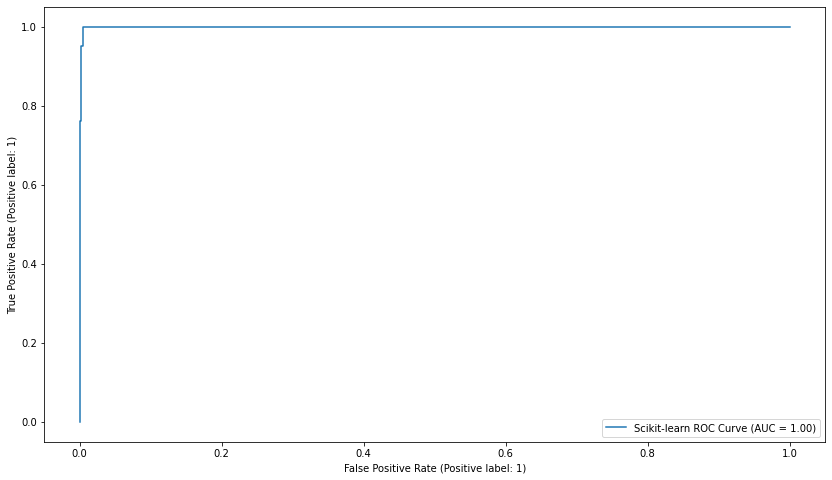

In [78]:
roc_plot = plot_roc_curve(sk_model, x_val, y_val, name='Scikit-learn ROC Curve')

Text(0.5, 51.0, 'Predicted')

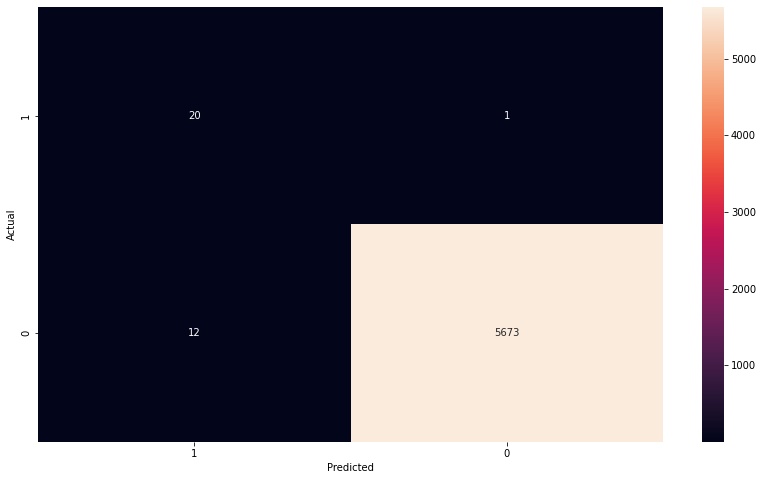

In [80]:
conf_matrix = confusion_matrix(y_val, preds)
ax = sns.heatmap(conf_matrix, annot=True,fmt='g') 
ax.invert_xaxis()
ax.invert_yaxis()
plt.ylabel('Actual')
plt.xlabel('Predicted')

## PySpark

In [86]:
import pyspark #
from pyspark.sql import SparkSession
from pyspark import SparkConf, SparkContext
from pyspark.sql.types import *
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression as LogisticRegressionPySpark
import pyspark.sql.functions as F
import os
import seaborn as sns
import sklearn #
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import matplotlib #
import matplotlib.pyplot as plt

os.environ["SPARK_LOCAL_IP"]='127.0.0.1'
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.sparkContext._conf.getAll()

print("pyspark: {}".format(pyspark.__version__))
print("matplotlib: {}".format(matplotlib.__version__))
print("seaborn: {}".format(sns.__version__))
print("sklearn: {}".format(sklearn.__version__))

pyspark: 3.1.2
matplotlib: 3.4.3
seaborn: 0.11.2
sklearn: 0.24.2


In [88]:
data_path = 'data/creditcard.csv'
df = spark.read.csv(data_path, header = True, inferSchema = True) 
labelColumn = "Class"
columns = df.columns
numericCols = columns
numericCols.remove(labelColumn)
print(numericCols)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [89]:
df.show(2)

21/10/01 22:17:39 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+----+----------------+-------------------+----------------+-----------------+------------------+-------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+-----------------+------------------+--------------------+-------------------+------+-----+
|Time|              V1|                 V2|              V3|               V4|                V5|                 V6|                 V7|                V8|                V9|               V10|               V11|               V12|               V13|               V14|              V15|               V16|               V17|               V18|               V19|                V20|               V21|               V22|               V23|       

In [90]:
df.toPandas().head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [91]:
stages = []
assemblerInputs = numericCols
assembler = VectorAssembler(inputCols=assemblerInputs,outputCol="features")
stages += [assembler]
dfFeatures = df.select(F.col(labelColumn).alias('label'), *numericCols )

In [92]:
normal = dfFeatures.filter("Class == 0"). sample(withReplacement=False, fraction=0.5, seed=2020) 
anomaly = dfFeatures.filter("Class == 1")

In [93]:
normal_train, normal_test = normal.randomSplit([0.8, 0.2], seed = 2020)
anomaly_train, anomaly_test = anomaly.randomSplit([0.8, 0.2], seed = 2020)

In [94]:
train = normal_train.union(anomaly_train)
test = normal_test.union(anomaly_test)

In [95]:
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(dfFeatures)
train = pipelineModel.transform(train)
test = pipelineModel.transform(test)
selectedCols = ['label', 'features'] + numericCols

train = train.select(selectedCols)
test = test.select(selectedCols)

print("Training Dataset Count: ", train.count())
print("Test Dataset Count: ", test.count())

Training Dataset Count:  114161


Test Dataset Count:  28465


In [96]:
# Model Training

lr = LogisticRegressionPySpark(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(train)
trainingSummary = lrModel.summary
pyspark_auc_score = trainingSummary.areaUnderROC

21/10/01 22:20:30 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
21/10/01 22:20:30 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS


In [98]:
predictions = lrModel.transform(test)

y_true = predictions.select(['label']).collect()
y_pred = predictions.select(['prediction']).collect()
evaluations = lrModel.evaluate(test)
accuracy = evaluations.accuracy

print(f"AUC Score: {roc_auc_score(y_pred, y_true):.3%}")
print(f"PySpark AUC Score: {pyspark_auc_score:.3%}")
print(f"Accuracy Score: {accuracy:.3%}")

AUC Score: 95.479%
PySpark AUC Score: 98.095%
Accuracy Score: 99.909%


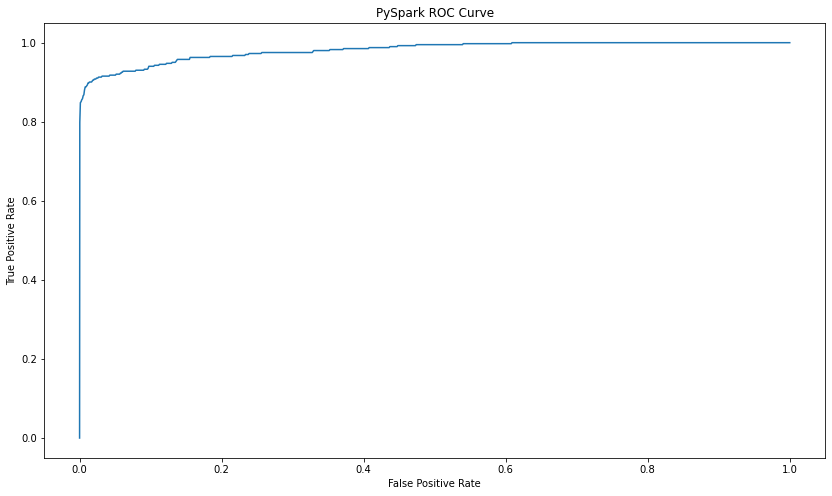

In [99]:
pyspark_roc = trainingSummary.roc.toPandas()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('PySpark ROC Curve')
plt.plot(pyspark_roc['FPR'],pyspark_roc['TPR'])

Text(0.5, 51.0, 'Predicted')

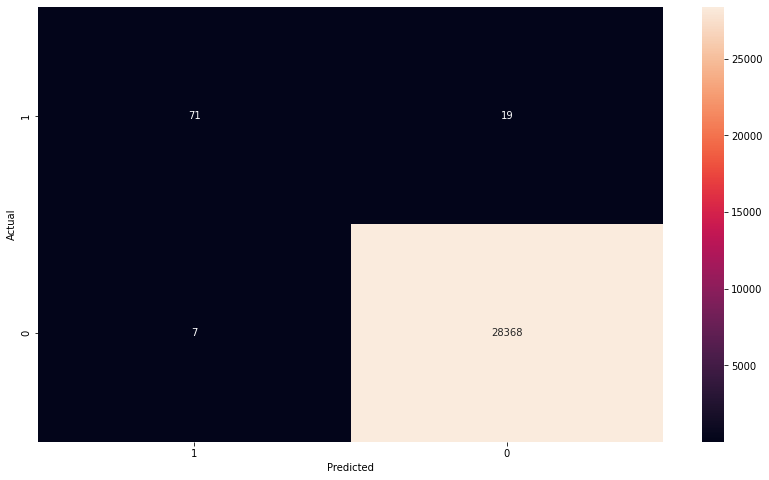

In [101]:
conf_matrix = confusion_matrix(y_true, y_pred)
ax = sns.heatmap(conf_matrix, annot=True,fmt='g') 
ax.invert_xaxis()
ax.invert_yaxis()
plt.ylabel('Actual')
plt.xlabel('Predicted')